IMPORTS:

In [ ]:
%run FUNCIONES_GENERALES.ipynb


In [ ]:
pip install skforecast

In [ ]:
# Procesado de datos
# ==============================================================================
import os
import pandas as pd
import numpy as np
from skforecast.datasets import fetch_dataset

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from skforecast.plot import set_dark_theme
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Keras
# ==============================================================================
os.environ["KERAS_BACKEND"] = "tensorflow" # 'tensorflow', 'jax´ or 'torch'
import keras
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM

if keras.__version__ > "3.0":
    if keras.backend.backend() == "tensorflow":
        import tensorflow
    elif keras.backend.backend() == "torch":
        import torch
    else:
        print("Backend not recognized. Please use 'tensorflow' or 'torch'.")

# Modelado
# ==============================================================================
import skforecast
from skforecast.ForecasterRnn import ForecasterRnn
from skforecast.ForecasterRnn.utils import create_and_compile_model
from sklearn.preprocessing import MinMaxScaler
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
from skforecast.datasets import fetch_dataset
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [ ]:
columna='Valor'

RNN con LSTM:

In [ ]:
def rnn (data_train,levels,steps,lags):
    model = create_and_compile_model(
        series=data_train,
        levels=levels,
        lags=lags,
        steps=steps,
        recurrent_layer="LSTM",
        recurrent_units=4,
        dense_units=16,
        optimizer=Adam(learning_rate=0.01),
        loss=MeanSquaredError()
    )
    return model

In [ ]:
def forecaster_rnn(data_train,levels,steps,lags,epochs,batch_size,data_val):
    forecaster = ForecasterRnn(
        regressor=rnn(data_train,levels,steps,lags),
        levels=levels,
        transformer_series=MinMaxScaler(),
        fit_kwargs={
            "epochs": epochs,  # Número de épocas para entrenar el modelo.
            "batch_size": batch_size,  # Tamaño del batch para entrenar el modelo.
            "callbacks": [
                EarlyStopping(monitor="val_loss", patience=5)
            ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
            "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
        },
    )
    forecaster.fit(data_train)
    return forecaster

In [ ]:
def backtesting_rnn(data,data_train,data_val,levels,steps,lags,epochs,batch_size,end_validation):

    forecaster = forecaster_rnn(data_train,levels,steps,lags,epochs,batch_size,data_val)
    metrics, predictions = backtesting_forecaster_multiseries(
        forecaster=forecaster,
        steps=forecaster.max_step,
        series=data,
        levels=forecaster.levels,
        initial_train_size=len(data_train), # Datos de entrenamiento + validación
        metric='mean_squared_error',
        verbose=False,
        refit=False,
    )

    fig, ax = plt.subplots(figsize=(6, 3))

    ax = data_val.plot(ax=ax,label='Valores Reales')
    predictions.plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(data.columns[0])

    plt.legend()
    plt.show()
    return metrics.loc[0, 'mean_squared_error']

TENDENCIA DETERMINISTA

In [ ]:
# División en train y test:
df1_train = df_csv('Datos/Determinista','Lineal-det-fin-train')
df1_test = df_csv('Datos/Determinista','Lineal-det-fin-test')
df1=pd.concat([df1_train,df1_test])
df1.index.freq='ME'

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoI

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.3701 - val_loss: 0.2860
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1873 - val_loss: 0.1075
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0741 - val_loss: 0.0269
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0454 - val_loss: 0.0203
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248 - val_loss: 0.0117
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - val_loss: 0.0296
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 0.0185
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0148


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_Altair

Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0011 - val_loss: 0.0152
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1880e-04 - val_loss: 0.0137
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6960e-04 - val_loss: 0.0124
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6239e-04 - val_loss: 0.0115
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1181e-04 - val_loss: 0.0115
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0805e-04 - val_loss: 0.0113
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3734e-05 - val_loss: 0.0119
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.7884e-05 - val_loss: 0.0115


  0%|          | 0/8 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module

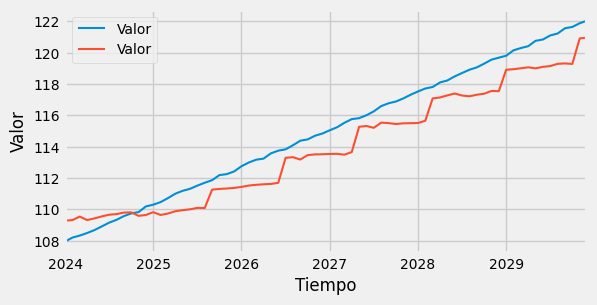

1.8780824066667436

In [ ]:
backtesting_rnn(df1,df1_train,df1_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df2_train = df_csv('Datos/Determinista','Pol-det-periodos-train')
df2_test = df_csv('Datos/Determinista','Pol-det-periodos-test')
df2=pd.concat([df2_train,df2_test])
df2.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0805 - val_loss: 0.1251
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0541 - val_loss: 0.1065
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0294 - val_loss: 0.0478
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0111
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0494e-04 - val_loss: 0.0081
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9583e-04 - val_loss: 0.0089
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.4599e-04 - val_loss: 0.0080
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8450e-04 - val_loss: 0.0075
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5535e-04 - val_loss: 0.0074
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1924e-04 - val_loss: 0.0076
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1037e-04 - val_loss: 0.0070
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7933e-05 - val_loss: 0.0074
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8118e-05 - val_loss: 0.0072
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2770e-05 - val_loss: 0.0071


  0%|          | 0/8 [00:00<?, ?it/s]

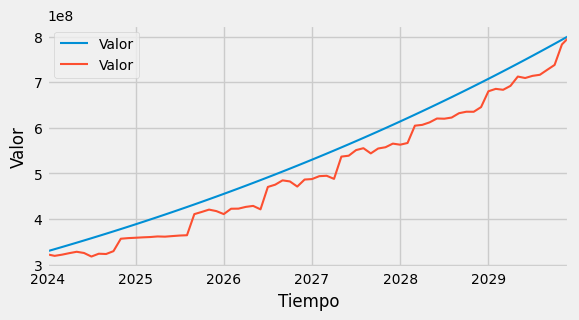

1493129430420630.5

In [ ]:
backtesting_rnn(df2,df2_train,df2_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df3_train = df_csv('Datos/Determinista','Exp-det-fin-train')
df3_test = df_csv('Datos/Determinista','Exp-det-fin-test')
df3=pd.concat([df3_train,df3_test])
df3.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5777e-05 - val_loss: 1.8668e-05
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9662e-06 - val_loss: 4.9593e-06
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0291e-06 - val_loss: 1.1135e-06
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3351e-06 - val_loss: 3.9898e-07
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3863e-07 - val_loss: 2.7868e-07
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0114e-07 - val_loss: 1.4234e-07
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6648e-07 - val_loss: 6.0649e-08
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6779e-07 - val_loss: 1.8966e-08
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.2714e-08 - val_loss: 1.4700e-08
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.8571e-08 - val_loss: 1.9892e-08
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0757e-08 - val_loss: 1.7962e-08
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2184e-07 - val_loss: 1.9815e-09
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3877e-08 - val_loss: 5.1138e-09
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8204e-08 - val_loss: 4.4559e-09
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5157e-08 - val_loss: 2.3401e-08
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0301e-07 - val_loss: 2.8039e-08


  0%|          | 0/8 [00:00<?, ?it/s]

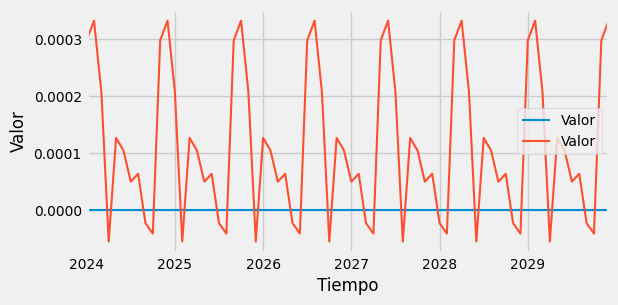

3.002302312088232e-08

In [ ]:
backtesting_rnn(df3,df3_train,df3_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df4_train = df_csv('Datos/Determinista','Log-det-periodos-train')
df4_test = df_csv('Datos/Determinista','Log-det-periodos-test')
df4=pd.concat([df4_train,df4_test])
df4.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0235 - val_loss: 0.0686
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0424
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - val_loss: 0.0228
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 - val_loss: 0.0577
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9634e-04 - val_loss: 0.0122
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7762e-04 - val_loss: 0.0120
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.9971e-04 - val_loss: 0.0089
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5278e-04 - val_loss: 0.0094
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0888e-04 - val_loss: 0.0090
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4136e-05 - val_loss: 0.0078
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4810e-05 - val_loss: 0.0079


  0%|          | 0/8 [00:00<?, ?it/s]

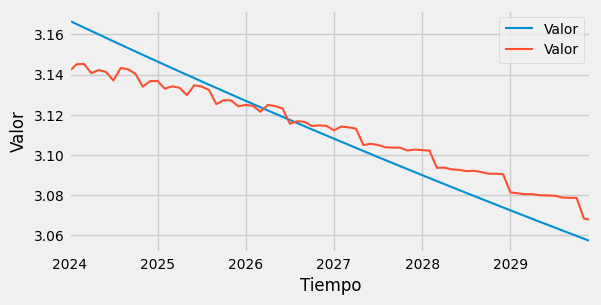

0.00012445265846284116

In [ ]:
backtesting_rnn(df4,df4_train,df4_test,[columna],10,20,8,30,144)

DATOS CON DISTRIBUCIONES

In [ ]:
# División en train y test:
df5 = df_csv('Datos/Distribuciones','Normal-fin')
df5_train = df5[:288]
df5_test = df5[288:]
df5.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2317 - val_loss: 0.1213
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0768 - val_loss: 0.0740
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0427 - val_loss: 0.0647
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0388 - val_loss: 0.0641
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0370 - val_loss: 0.0626
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0351 - val_loss: 0.0619
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0356 - val_loss: 0.0618
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0357 - val_loss: 0.0617


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0353 - val_loss: 0.0616
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0352 - val_loss: 0.0616
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0358 - val_loss: 0.0616
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0357 - val_loss: 0.0617
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0361 - val_loss: 0.0615
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0355 - val_loss: 0.0615
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0361 - val_loss: 0.0616
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0360 - val_loss: 0.0615


  0%|          | 0/8 [00:00<?, ?it/s]

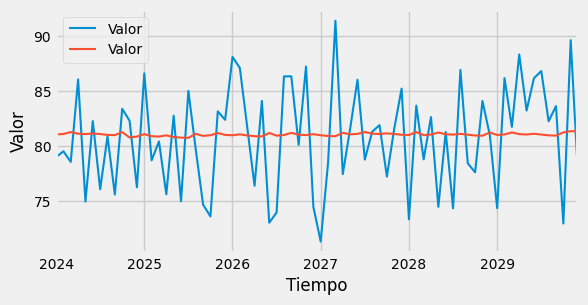

22.63225828299426

In [ ]:
backtesting_rnn(df5,df5_train,df5_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df6 = df_csv('Datos/Distribuciones','Binomial-periodos')
df6_train = df6[:288]
df6_test = df6[288:]
df6.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.2266 - val_loss: 0.0732
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0670 - val_loss: 0.0471
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0361 - val_loss: 0.0311
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0304 - val_loss: 0.0309
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0296 - val_loss: 0.0315
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0281 - val_loss: 0.0300
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0279 - val_loss: 0.0299
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0285 - val_loss: 0.0301
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0285 - val_loss: 0.0304
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0281 - val_loss: 0.0299
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0277 - val_loss: 0.0303
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0290 - val_loss: 0.0303
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0275 - val_loss: 0.0302


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.42857143 0.57142857 0.28571429 0.42857143 0.42857143 0.42857143
 0.21428571 0.57142857 0.57142857 0.28571429 0.42857143 0.35714286
 0.21428571 0.42857143 0.42857143 0.42857143 0.57142857 0.78571429
 0.57142857 0.28571429]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.42857143 0.35714286 0.21428571 0.42857143 0.42857143 0.42857143
 0.57142857 0.78571429 0.57142857 0.28571429 0.64285714 0.57142857
 0.35714286 0.28571429 0.35714286 0.5        1.         0.35714286
 0.42857143 0.64285714]' has dtype incompatible with int64, please explic

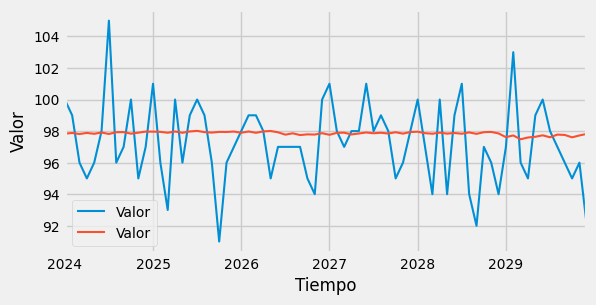

6.7193130666047285

In [ ]:
backtesting_rnn(df6,df6_train,df6_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df7 = df_csv('Datos/Distribuciones','Geometrica-fin')
df7_train = df7[:288]
df7_test = df7[288:]
df7.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0431 - val_loss: 0.0293
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0306 - val_loss: 0.0271
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0297 - val_loss: 0.0275
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280 - val_loss: 0.0271
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0275 - val_loss: 0.0269
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - val_loss: 0.0270
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - val_loss: 0.0268
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0278 - val_loss: 0.0270
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0287 - val_loss: 0.0270
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0284 - val_loss: 0.0269
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0277 - val_loss: 0.0270
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0275 - val_loss: 0.0269
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0278 - val_loss: 0.0270


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.21428571 0.07142857 0.42857143 0.         0.42857143 0.14285714
 0.28571429 0.         0.14285714 0.14285714 0.14285714 0.
 0.         0.         0.         0.5        0.         0.78571429
 0.14285714 0.07142857]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.14285714 0.         0.         0.         0.         0.5
 0.         0.78571429 0.14285714 0.07142857 0.14285714 0.
 0.         0.64285714 0.07142857 0.07142857 0.07142857 0.07142857
 0.         0.21428571]' has dtype incompatible with int64, please explicitly cast to a compatib

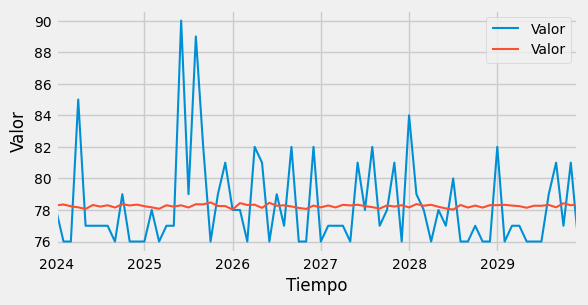

8.615500228376025

In [ ]:
backtesting_rnn(df7,df7_train,df7_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
dfg = df_csv('Datos/Distribuciones','Poisson-periodos')
dfg_train = dfg[:288]
dfg_test = dfg[288:]
dfg.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.1692 - val_loss: 0.1444
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0813 - val_loss: 0.0683
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0421 - val_loss: 0.0519
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0319 - val_loss: 0.0545
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0314 - val_loss: 0.0531
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0305 - val_loss: 0.0515
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - val_loss: 0.0522
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0327 - val_loss: 0.0527


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0311 - val_loss: 0.0523
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0310 - val_loss: 0.0523
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0297 - val_loss: 0.0519
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0300 - val_loss: 0.0524
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0314 - val_loss: 0.0520


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.45454545 0.36363636 0.36363636 0.18181818 0.63636364 0.27272727
 0.36363636 0.54545455 0.18181818 0.54545455 0.72727273 0.09090909
 0.36363636 0.45454545 0.54545455 0.72727273 0.27272727 0.27272727
 0.27272727 0.72727273]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.72727273 0.09090909 0.36363636 0.45454545 0.54545455 0.72727273
 0.27272727 0.27272727 0.27272727 0.72727273 0.54545455 0.45454545
 0.54545455 0.36363636 0.81818182 0.27272727 0.18181818 0.09090909
 0.18181818 0.27272727]' has dtype incompatible with int64, please explic

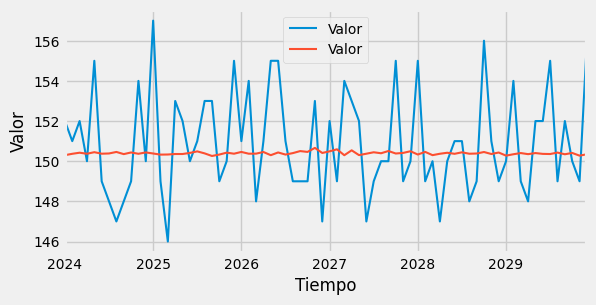

6.855231379032678

In [ ]:
backtesting_rnn(dfg,dfg_train,dfg_test,[columna],10,20,8,30,144)

In [ ]:
# Dividimos en train y test
df8 = df_csv('Datos/Distribuciones','Hipergeometrica-fin')
df8_train = df8[:288]
df8_test = df8[288:]
df8.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2722 - val_loss: 0.2131
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1947 - val_loss: 0.1530
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1376 - val_loss: 0.1106
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0923 - val_loss: 0.0838
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0687 - val_loss: 0.0688
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0505 - val_loss: 0.0620
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - val_loss: 0.0596
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0405 - val_loss: 0.0593
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0396 - val_loss: 0.0595
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - val_loss: 0.0599
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - val_loss: 0.0600
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0384 - val_loss: 0.0601
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0390 - val_loss: 0.0600


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.125 0.5   0.5   0.5   0.25  0.625 0.875 0.375 0.875 0.25  0.    0.375
 0.5   0.5   0.625 0.375 0.625 0.25  0.625 0.5  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.    0.375 0.5   0.5   0.625 0.375 0.625 0.25  0.625 0.5   0.125 0.375
 0.25  0.375 0.5   0.25  0.625 0.5   0.625 0.625]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will 

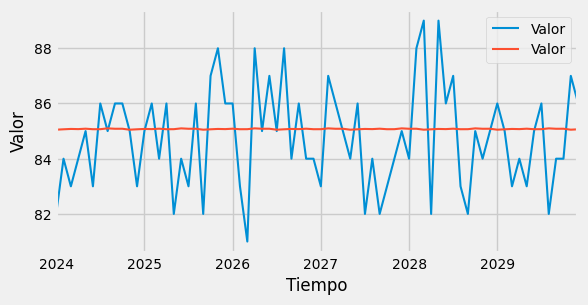

3.456620318963865

In [ ]:
backtesting_rnn(df8,df8_train,df8_test,[columna],10,20,8,30,144)

In [ ]:
df9 = df_csv('Datos/Distribuciones','Uniforme-periodos')
df9_train = df9[:288]
df9_test = df9[288:]
df9.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3164 - val_loss: 0.1646
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1544 - val_loss: 0.0968
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0925 - val_loss: 0.0812
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0875 - val_loss: 0.0804
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0859 - val_loss: 0.0786
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0845 - val_loss: 0.0777
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0854 - val_loss: 0.0777
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0842 - val_loss: 0.0779


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0835 - val_loss: 0.0775
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0849 - val_loss: 0.0777
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828 - val_loss: 0.0777
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - val_loss: 0.0776
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0828 - val_loss: 0.0775
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0840 - val_loss: 0.0777


  0%|          | 0/8 [00:00<?, ?it/s]

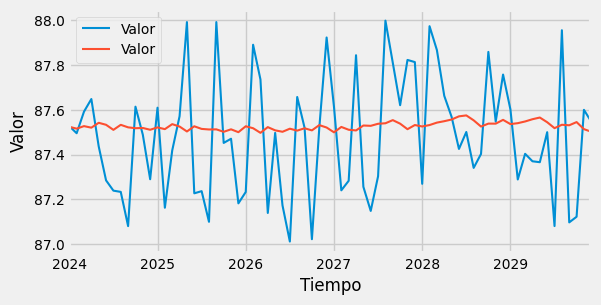

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



0.07370500902722381

In [ ]:
backtesting_rnn(df9,df9_train,df9_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df10 = df_csv('Datos/Distribuciones','Constante-fin')
df10_train = df10[:288]
df10_test = df10[288:]
df10.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


  0%|          | 0/8 [00:00<?, ?it/s]

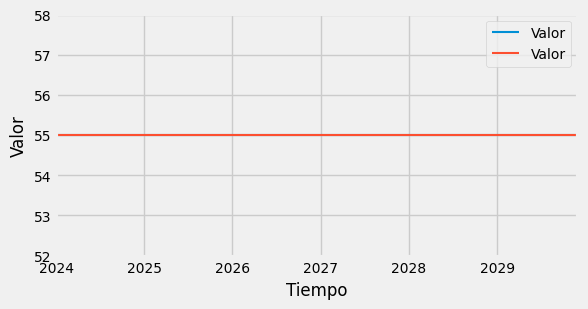

0.0

In [ ]:
backtesting_rnn(df10,df10_train,df10_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df11 = df_csv('Datos/Distribuciones','Gamma-periodos')
df11_train = df11[:288]
df11_test = df11[288:]
df11.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1450 - val_loss: 0.0640
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0614 - val_loss: 0.0649
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0537 - val_loss: 0.0502
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0460 - val_loss: 0.0490
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0471 - val_loss: 0.0506
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0464 - val_loss: 0.0509
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0447 - val_loss: 0.0494
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0458 - val_loss: 0.0500
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0449 - val_loss: 0.0497
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - val_loss: 0.0500
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - val_loss: 0.0498
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - val_loss: 0.0497
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0462 - val_loss: 0.0498


  0%|          | 0/8 [00:00<?, ?it/s]

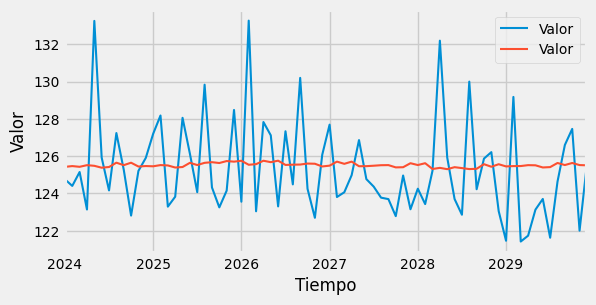

6.826439859579768

In [ ]:
backtesting_rnn(df11,df11_train,df11_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df12 = df_csv('Datos/Distribuciones','Beta-fin')
df12_train = df12[:288]
df12_test = df12[288:]
df12.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.1873 - val_loss: 0.0847
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0690 - val_loss: 0.0654
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - val_loss: 0.0654
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0451 - val_loss: 0.0649
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0479 - val_loss: 0.0640
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446 - val_loss: 0.0637
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0456 - val_loss: 0.0638
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0469 - val_loss: 0.0637
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0453 - val_loss: 0.0637
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0444 - val_loss: 0.0638
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458 - val_loss: 0.0638
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0449 - val_loss: 0.0638
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0452 - val_loss: 0.0639
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0460 - val_loss: 0.0639


  0%|          | 0/8 [00:00<?, ?it/s]

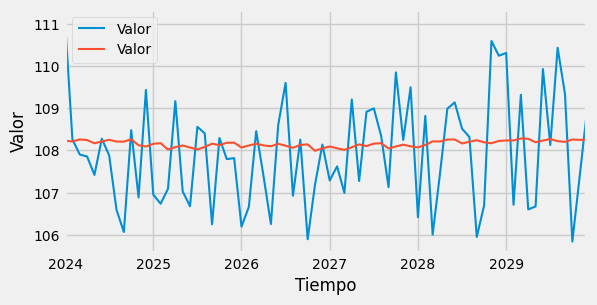

1.658323312004678

In [ ]:
backtesting_rnn(df12,df12_train,df12_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df13 = df_csv('Datos/Distribuciones','Exponencial-periodos')
df13_train = df13[:288]
df13_test = df13[288:]
df13.index.freq='ME'


keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0593 - val_loss: 0.0648
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - val_loss: 0.0599
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0363 - val_loss: 0.0614
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0354 - val_loss: 0.0607
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0351 - val_loss: 0.0600
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0356 - val_loss: 0.0602
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0339 - val_loss: 0.0604
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0356 - val_loss: 0.0600
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0353 - val_loss: 0.0604
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0355 - val_loss: 0.0601
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0358 - val_loss: 0.0602
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0347 - val_loss: 0.0602


  0%|          | 0/8 [00:00<?, ?it/s]

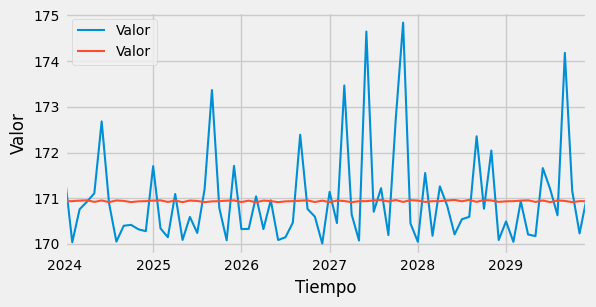

1.162657617931801

In [ ]:
backtesting_rnn(df13,df13_train,df13_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df14 = df_csv('Datos/Distribuciones','Chi_cuadrado-fin')
df14_train = df14[:288]
df14_test = df14[288:]
df14.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0378 - val_loss: 0.0703
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0237 - val_loss: 0.0631
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - val_loss: 0.0715
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0232 - val_loss: 0.0697
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - val_loss: 0.0687
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0222 - val_loss: 0.0693
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0218 - val_loss: 0.0693
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0215 - val_loss: 0.0697
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0226 - val_loss: 0.0684
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0213 - val_loss: 0.0699
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - val_loss: 0.0687
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - val_loss: 0.0691


  0%|          | 0/8 [00:00<?, ?it/s]

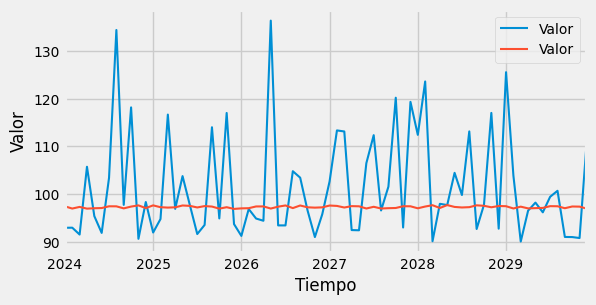

137.92818396337867

In [ ]:
backtesting_rnn(df14,df14_train,df14_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df15 = df_csv('Datos/Distribuciones','T_Student-periodos')
df15_train = df15[:288]
df15_test = df15[288:]
df15.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2891 - val_loss: 0.1372
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1516 - val_loss: 0.0654
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0552 - val_loss: 0.0357
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0211 - val_loss: 0.0385
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - val_loss: 0.0401
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - val_loss: 0.0372
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0179 - val_loss: 0.0375
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0184 - val_loss: 0.0370
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0189 - val_loss: 0.0369
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - val_loss: 0.0374
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0178 - val_loss: 0.0373
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0187 - val_loss: 0.0375
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.0379


  0%|          | 0/8 [00:00<?, ?it/s]

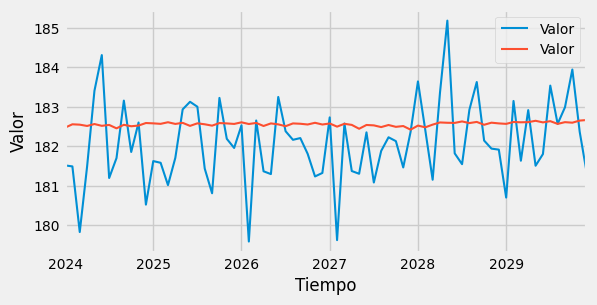

1.2501419015861313

In [ ]:
backtesting_rnn(df15,df15_train,df15_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df16 = df_csv('Datos/Distribuciones','Lognormal-fin')
df16_train = df16[:288]
df16_test = df16[288:]
df16.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0104 - val_loss: 0.0357
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - val_loss: 0.0366
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - val_loss: 0.0363
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - val_loss: 0.0361
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103 - val_loss: 0.0362
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - val_loss: 0.0362


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0085 - val_loss: 0.0365
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0358
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0366
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0361
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0097 - val_loss: 0.0363


  0%|          | 0/8 [00:00<?, ?it/s]

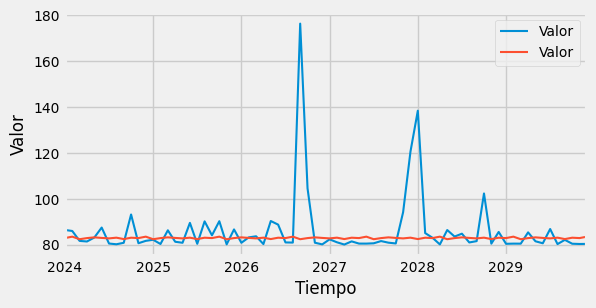

208.39015515367808

In [ ]:
backtesting_rnn(df16,df16_train,df16_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df17 = df_csv('Datos/Distribuciones','Pareto-periodos')
df17_train = df17[:288]
df17_test = df17[288:]
df17.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0361 - val_loss: 0.0118
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0284 - val_loss: 0.0122
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0243 - val_loss: 0.0151
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0238 - val_loss: 0.0168
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0250 - val_loss: 0.0167
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0229 - val_loss: 0.0159
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0257 - val_loss: 0.0152
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0218 - val_loss: 0.0144
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0232 - val_loss: 0.0140
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0205 - val_loss: 0.0139
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0218 - val_loss: 0.0140


  0%|          | 0/22 [00:00<?, ?it/s]

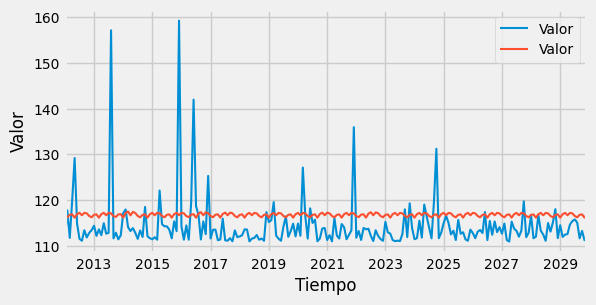

38.296553952958895

In [ ]:
backtesting_rnn(df17,df17[:144],df17[144:],[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df18 = df_csv('Datos/Distribuciones','Lineal-asc-fin')
df18_train = df18[:288]
df18_test = df18[288:]
df18.index.freq='ME'


keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3266 - val_loss: 0.2127
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1248 - val_loss: 0.0357
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0530 - val_loss: 0.0154
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0318 - val_loss: 0.0224
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0226 - val_loss: 0.0048
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - val_loss: 0.0172
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - val_loss: 0.0257
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0178


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0035 - val_loss: 0.0144
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026 - val_loss: 0.0157
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026 - val_loss: 0.0137
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 0.0135
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 0.0146


  0%|          | 0/8 [00:00<?, ?it/s]

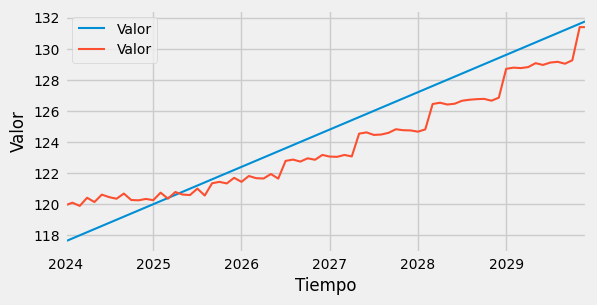

2.379360570006156

In [ ]:
backtesting_rnn(df18,df18_train,df18_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df19 = df_csv('Datos/Distribuciones','Lineal-desc-periodos')
df19_train = df19[:288]
df19_test = df19[288:]
df19.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2638 - val_loss: 0.0329
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1166 - val_loss: 0.1439
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0519 - val_loss: 0.0888
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0251 - val_loss: 0.0524
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082 - val_loss: 0.0311
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031 - val_loss: 0.0240
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - val_loss: 0.0197
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0211
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8.3895e-04 - val_loss: 0.0213
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1016e-04 - val_loss: 0.0212
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8318e-04 - val_loss: 0.0204
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9560e-04 - val_loss: 0.0199
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3715e-04 - val_loss: 0.0196
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9857e-05 - val_loss: 0.0190
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0520e-05 - val_loss: 0.0196
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4983e-05 - val_loss: 0.0194


  0%|          | 0/8 [00:00<?, ?it/s]

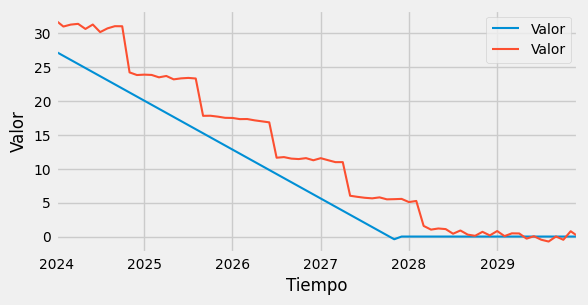

20.361998185646694

In [ ]:
backtesting_rnn(df19,df19_train,df19_test,[columna],10,20,8,30,144)

In [ ]:
## División en train y test:
df20 = df_csv('Datos/Distribuciones','Aleatorio-fin')
df20_train = df20[:288]
df20_test = df20[288:]
df20.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2830 - val_loss: 0.2951
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2112 - val_loss: 0.2277
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1584 - val_loss: 0.1787
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1191 - val_loss: 0.1461
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1010 - val_loss: 0.1261
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0890 - val_loss: 0.1151
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0839 - val_loss: 0.1096
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0822 - val_loss: 0.1069
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0820 - val_loss: 0.1059
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0843 - val_loss: 0.1055
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0819 - val_loss: 0.1056
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0814 - val_loss: 0.1057
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0827 - val_loss: 0.1058
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - val_loss: 0.1060
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0817 - val_loss: 0.1060


  0%|          | 0/8 [00:00<?, ?it/s]

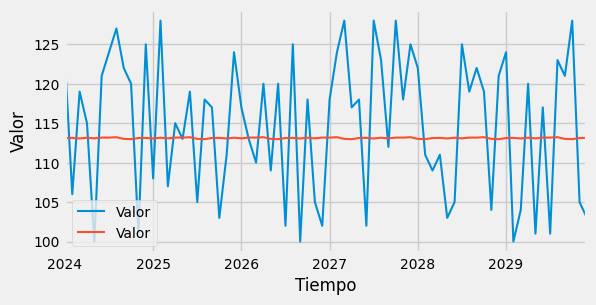

80.53807604873711

In [ ]:
backtesting_rnn(df20,df20_train,df20_test,[columna],10,20,8,30,144)

MODELOS PERIÓDICOS

In [ ]:
# División en train y test:
df21 = df_csv('Datos/Periodicas','Amplitud-fin')
df21_train = df21[:288]
df21_test = df21[288:]
df21.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2982 - val_loss: 0.1736
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1486 - val_loss: 0.0978
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0946 - val_loss: 0.0913
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0912 - val_loss: 0.0897
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0879 - val_loss: 0.0875
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0865 - val_loss: 0.0859
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0857 - val_loss: 0.0851
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0851 - val_loss: 0.0845
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0841 - val_loss: 0.0837
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0837 - val_loss: 0.0827
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0819 - val_loss: 0.0810
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0797 - val_loss: 0.0781
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0774 - val_loss: 0.0744
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0736 - val_loss: 0.0681
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0663 - val_loss: 0.0612
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0613 - val_loss: 0.0537


  0%|          | 0/8 [00:00<?, ?it/s]

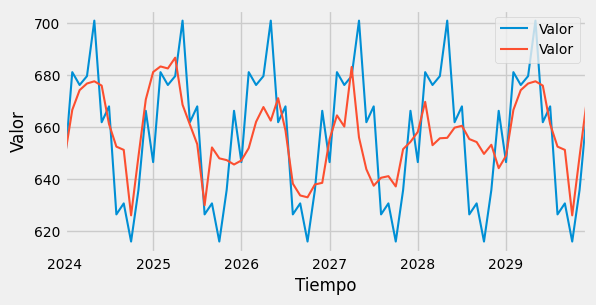

352.4438667025623

In [ ]:
backtesting_rnn(df21,df21_train,df21_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df22 = df_csv('Datos/Periodicas','Amplitud-periodos')
df22_train = df22[:288]
df22_test = df22[288:]
df22.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.3541 - val_loss: 0.2926
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2773 - val_loss: 0.2284
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2134 - val_loss: 0.1682
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1565 - val_loss: 0.1438
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1438 - val_loss: 0.1377
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1340 - val_loss: 0.1253
Epoch 7/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1256 - val_loss: 0.1228
Epoch 8/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1237 - val_loss: 0.1235
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.1233 - val_loss: 0.1228
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1222 - val_loss: 0.1210
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1210 - val_loss: 0.1195
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1197 - val_loss: 0.1178
Epoch 5/8
4/4 ━━━━━━━━━━

  0%|          | 0/22 [00:00<?, ?it/s]

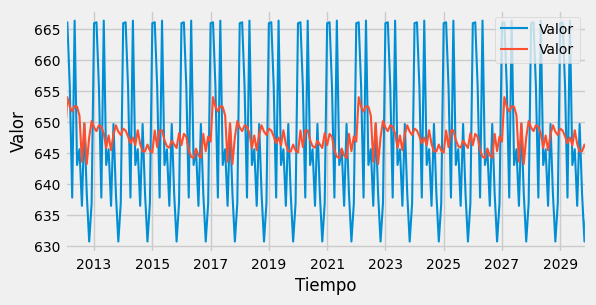

140.01525691234946

In [ ]:
backtesting_rnn(df22,df22[:144],df22[144:],[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df23 = df_csv('Datos/Periodicas','Cantidad-fin')
df23_train = df23[:288]
df23_test = df23[288:]
df23.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2324 - val_loss: 0.0946
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0891 - val_loss: 0.0474
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0484 - val_loss: 0.0444
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0465 - val_loss: 0.0434
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0430 - val_loss: 0.0421
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0436 - val_loss: 0.0419
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0442 - val_loss: 0.0416
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - val_loss: 0.0414
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0434 - val_loss: 0.0414
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0436 - val_loss: 0.0413
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0419 - val_loss: 0.0414
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0426 - val_loss: 0.0414
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0429 - val_loss: 0.0412
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0428 - val_loss: 0.0414
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0419 - val_loss: 0.0412
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0420 - val_loss: 0.0411


  0%|          | 0/8 [00:00<?, ?it/s]

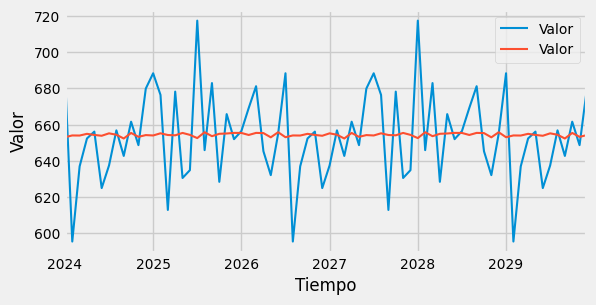

632.6138541259235

In [ ]:
backtesting_rnn(df23,df23_train,df23_test,[columna],10,20,8,30,144)

In [ ]:
# División en train y test:
df24 = df_csv('Datos/Periodicas','Cantidad-periodos')
df24_train = df24[:288]
df24_test = df24[288:]
df24.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3354 - val_loss: 0.1895
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1480 - val_loss: 0.0907
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0796 - val_loss: 0.0782
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0729 - val_loss: 0.0781
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0702 - val_loss: 0.0758
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0692 - val_loss: 0.0753
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0706 - val_loss: 0.0753
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0701 - val_loss: 0.0751
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0696 - val_loss: 0.0748
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0692 - val_loss: 0.0746
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0689 - val_loss: 0.0747
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0679 - val_loss: 0.0744
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0696 - val_loss: 0.0744
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0681 - val_loss: 0.0742
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0679 - val_loss: 0.0741
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0680 - val_loss: 0.0739


  0%|          | 0/8 [00:00<?, ?it/s]

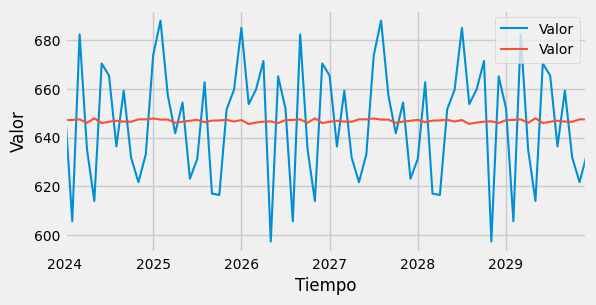

571.921833150607

In [ ]:
backtesting_rnn(df24,df24_train,df24_test,[columna],10,20,8,30,144)

MODELOS ARMA

In [ ]:
df25 = df_csv('Datos/ARMA','AR-fin')
df25_train = df25[:288]
df25_test = df25[288:]
df25.index.freq='ME'
df25_train.index.freq='ME'
df25_test.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.9162 - val_loss: 0.1786
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4971 - val_loss: 0.0545
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0814 - val_loss: 0.0411
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0587
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - val_loss: 0.0549
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0625
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0568
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2602e-04 - val_loss: 0.0597
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.0599e-04 - val_loss: 0.0588
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6246e-04 - val_loss: 0.0597
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.1733e-05 - val_loss: 0.0598
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1100e-05 - val_loss: 0.0599
Epoch 5/8
9/

  0%|          | 0/8 [00:00<?, ?it/s]

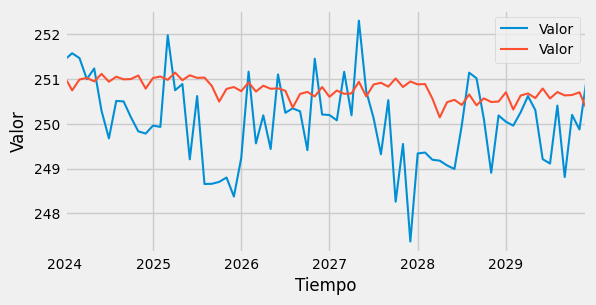

1.4044316038387223

In [ ]:
backtesting_rnn(df25,df25_train,df25_test,[columna],10,20,8,30,144)

In [ ]:
df26 = df_csv('Datos/ARMA','MA-periodos')
df26_train = df26[:288]
df26_test = df26[288:]
df26.index.freq='ME'
df26_train.index.freq='ME'
df26_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1484 - val_loss: 0.0575
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 - val_loss: 0.0414
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0340 - val_loss: 0.0444
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0355 - val_loss: 0.0403
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0319 - val_loss: 0.0401
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0313 - val_loss: 0.0396
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0311 - val_loss: 0.0396
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0320 - val_loss: 0.0399
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0327 - val_loss: 0.0394
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0315 - val_loss: 0.0395
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0306 - val_loss: 0.0395
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0298 - val_loss: 0.0395
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━

  0%|          | 0/8 [00:00<?, ?it/s]

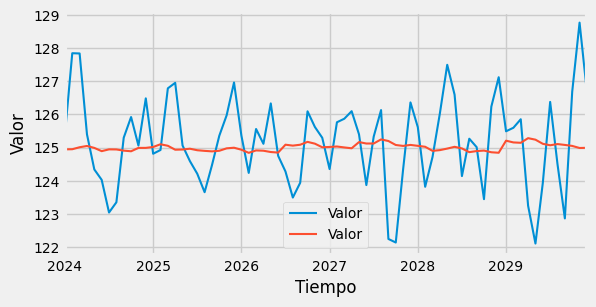

1.9617301857825826

In [ ]:
backtesting_rnn(df26,df26_train,df26_test,[columna],10,20,8,30,144)

In [ ]:
df27 = df_csv('Datos/ARMA','ARMA-fin')
df27_train = df27[:288]
df27_test = df27[288:]
df27.index.freq='ME'
df27_train.index.freq='ME'
df27_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.8821 - val_loss: 0.1210
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5981 - val_loss: 0.0608
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2393 - val_loss: 0.3084
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0445 - val_loss: 0.3167
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.3517
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.3417
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.3418
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.5701e-04 - val_loss: 0.3454
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3918e-04 - val_loss: 0.3409
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9173e-04 - val_loss: 0.3430
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1546e-04 - val_loss: 0.3411
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7728e-04 - val_loss: 0.3435


  0%|          | 0/8 [00:00<?, ?it/s]

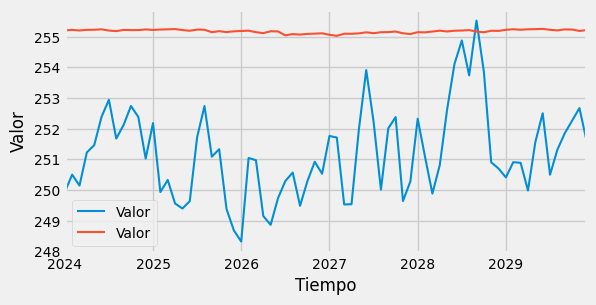

17.865684230330828

In [ ]:
backtesting_rnn(df27,df27_train,df27_test,[columna],10,20,8,30,144)

In [ ]:
df28 = df_csv('Datos/ARMA','AR-estacional-periodos')
df28_train = df28[:288]
df28_test = df28[288:]
df28.index.freq='ME'
df28_train.index.freq='ME'
df28_test.index.freq='ME'

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.8314 - val_loss: 0.1524
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3222 - val_loss: 0.0990
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0503 - val_loss: 0.0942
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0948
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - val_loss: 0.0917
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0907
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0843
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0827
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0015 - val_loss: 0.0782
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0762
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017 - val_loss: 0.0737
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 0.0732
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━

  0%|          | 0/8 [00:00<?, ?it/s]

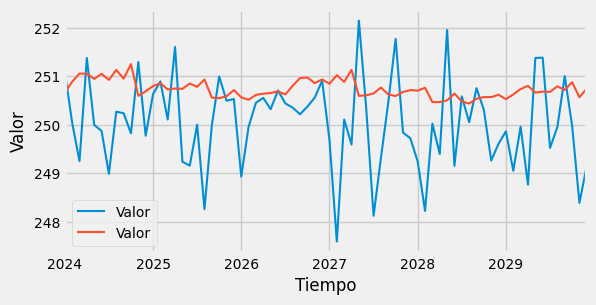

1.3952274720934303

In [ ]:
backtesting_rnn(df28,df28_train,df28_test,[columna],10,20,8,30,144)

In [ ]:
df29 = df_csv('Datos/ARMA','MA-estacional-fin')
df29_train = df29[:288]
df29_test = df29[288:]
df29.index.freq='ME'
df29_train.index.freq='ME'
df29_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3177 - val_loss: 0.1946
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1844 - val_loss: 0.0928
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0860 - val_loss: 0.0461
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0500 - val_loss: 0.0395
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0388 - val_loss: 0.0326
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0374 - val_loss: 0.0330
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0378 - val_loss: 0.0329
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 - val_loss: 0.0328
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0358 - val_loss: 0.0323
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0357 - val_loss: 0.0322
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0367 - val_loss: 0.0323
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0360 - val_loss: 0.0324
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 

  0%|          | 0/8 [00:00<?, ?it/s]

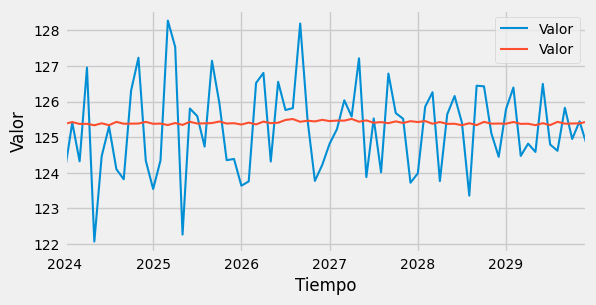

1.6145891878806597

In [ ]:
backtesting_rnn(df29,df29_train,df29_test,[columna],10,20,8,30,144)

In [ ]:
df30 = df_csv('Datos/ARMA','ARMA-estacional-periodos')
df30_train = df30[:288]
df30_test = df30[288:]
df30.index.freq='ME'
df30_train.index.freq='ME'
df30_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.6251 - val_loss: 0.1213
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1110 - val_loss: 0.0668
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - val_loss: 0.0635
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069 - val_loss: 0.0625
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.0656
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - val_loss: 0.0706
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0702
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0690
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0011 - val_loss: 0.0689
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0010 - val_loss: 0.0686
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3287e-04 - val_loss: 0.0695
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.2801e-04 - val_loss: 0.0693
Epoch 5/8
9/9 ━━━━━━━━━━

  0%|          | 0/8 [00:00<?, ?it/s]

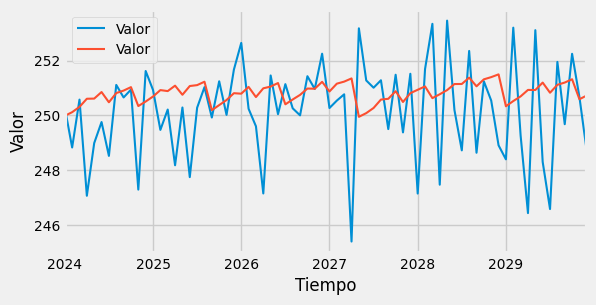

3.7045720037769283

In [ ]:
backtesting_rnn(df30,df30_train,df30_test,[columna],10,20,8,30,144)

FORECASTER AUTOREG

In [ ]:
def backtesting_forecasterAutoreg(datos_train,datos_test,lags,steps):

    forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = lags # Este valor será remplazado en el grid search
                )
    # Valores candidatos de lags
    lags_grid = [10, 20]

    # Valores candidatos de hiperparámetros del regresor
    param_grid = {
         'n_estimators': [100, 175,250,450],
         'max_depth': [3, 5, 10,15,20]
    }

    resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train[datos_train.columns[0]],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.8),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                    )
    # Predicciones
    # ==============================================================================
    predicciones = forecaster.predict(steps=len(datos_test))

    # Error de test
    # ==============================================================================
    error_mse = mean_squared_error(
                    y_true = datos_test,
                    y_pred = predicciones
                )
    fig, ax = plt.subplots(figsize=(6, 3))

    ax = datos_test.plot(ax=ax,label='Valores Reales')
    predicciones.plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(datos_train.columns[0])

    return error_mse

In [ ]:
df1_train.index.freq='ME'
df1_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 46.729936574517



72.18988675035342

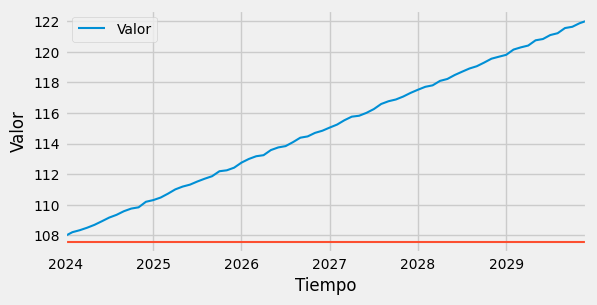

In [ ]:
backtesting_forecasterAutoreg(df1_train,df1_test,32,36)

In [ ]:
df2_train.index.freq='ME'
df2_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 1.1144550965404372e+16



6.6498324691737544e+16

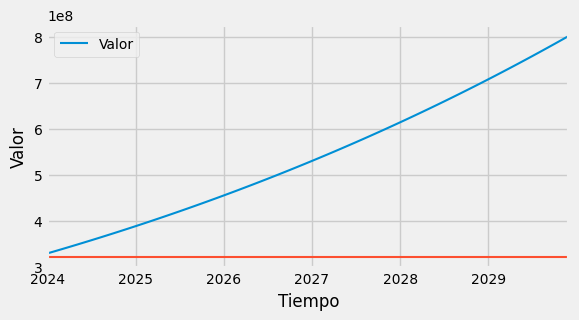

In [ ]:
backtesting_forecasterAutoreg(df2_train,df2_test,32,36)

In [ ]:
df3_train.index.freq='ME'
df3_test.index.freq='ME'

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 3.2630160539623097e-18



2.9591016746259624e-18

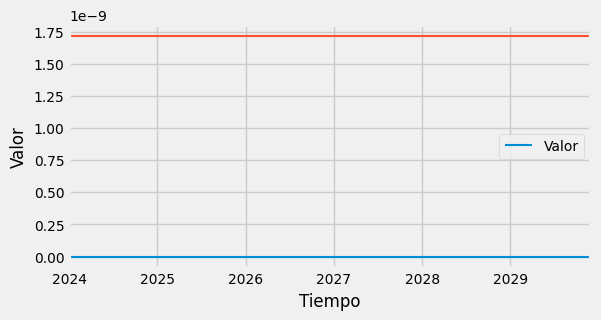

In [ ]:
backtesting_forecasterAutoreg(df3_train,df3_test,32,36)

In [ ]:
df4_train.index.freq='ME'
df4_test.index.freq='ME'

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 0.004698166980159835



0.004567980532230777

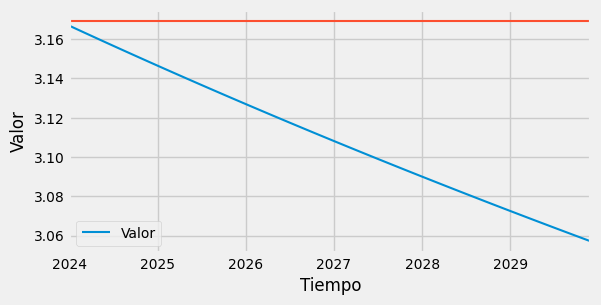

In [ ]:
backtesting_forecasterAutoreg(df4_train,df4_test,32,36)

MODELOS CON DISTRIBUCIONES

In [ ]:
df5_train.index.freq='ME'
df5_test.index.freq='ME'

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 15.896329567142407



24.310833157471336

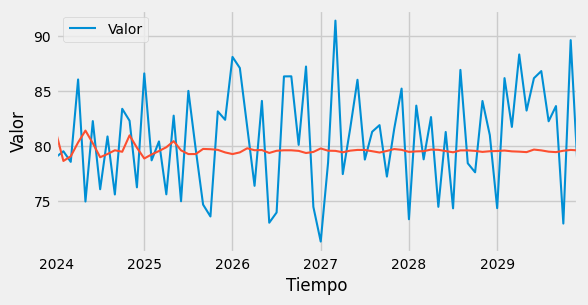

In [ ]:
backtesting_forecasterAutoreg(df5_train,df5_test,32,36)

In [ ]:
df6_train.index.freq='ME'
df6_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 6.256705634910523



6.438927796734835

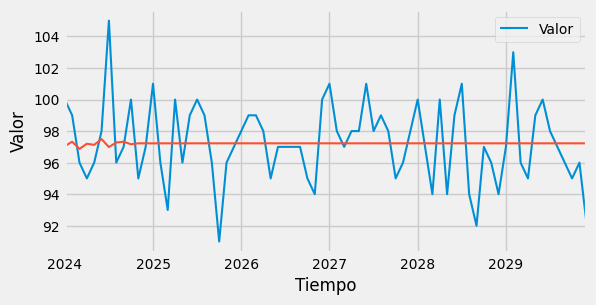

In [ ]:
backtesting_forecasterAutoreg(df6_train,df6_test,32,36)

In [ ]:
df7_train.index.freq='ME'
df7_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 6.261330909678777



8.59279307435404

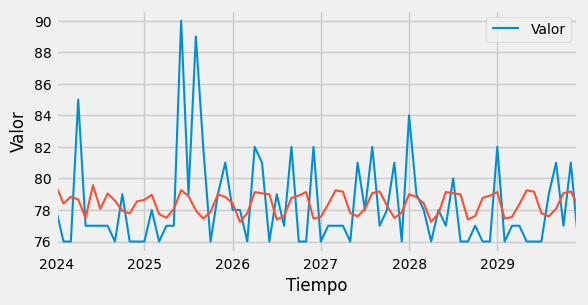

In [ ]:
backtesting_forecasterAutoreg(df7_train,df7_test,32,36)

In [ ]:
dfg_train.index.freq='ME'
dfg_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 250}
  Backtesting metric: 5.889096317991885



6.964972776802231

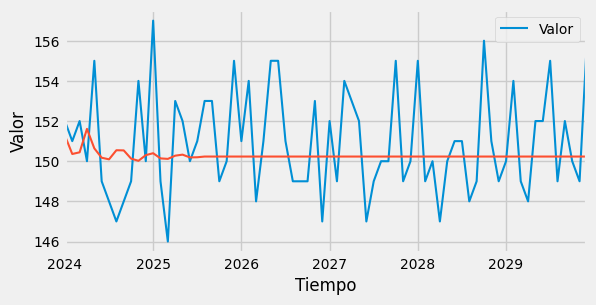

In [ ]:
backtesting_forecasterAutoreg(dfg_train,dfg_test,32,36)

In [ ]:
df8_train.index.freq='ME'
df8_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 250}
  Backtesting metric: 3.063158759723743



3.42745780237382

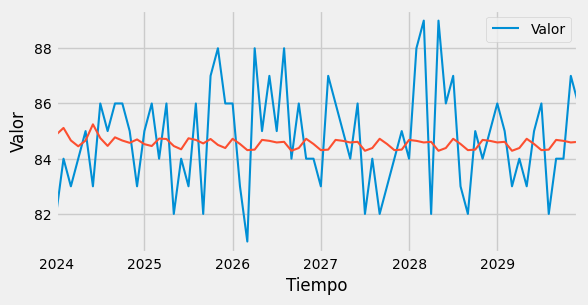

In [ ]:
backtesting_forecasterAutoreg(df8_train,df8_test,32,36)

In [ ]:
df9_train.index.freq='ME'
df9_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 15, 'n_estimators': 450}
  Backtesting metric: 0.08930998374345449



0.07207741349653426

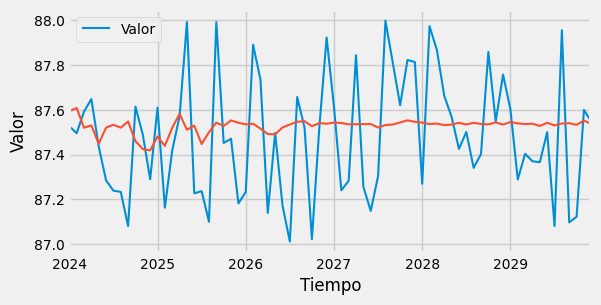

In [ ]:
backtesting_forecasterAutoreg(df9_train,df9_test,32,36)

In [ ]:
df10_train.index.freq='ME'
df10_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:263: UserWarning:

Feature 0 is constant and will be replaced with 0.



`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.0



0.0

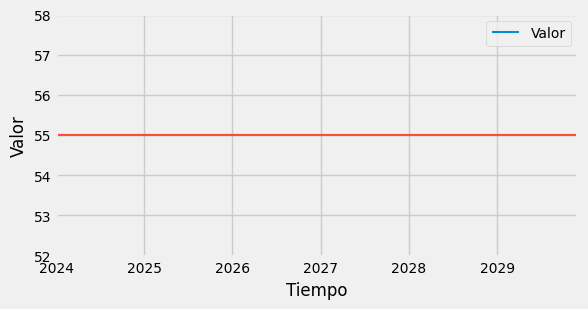

In [ ]:
backtesting_forecasterAutoreg(df10_train,df10_test,32,36)

In [ ]:
df11_train.index.freq='ME'
df11_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 175}
  Backtesting metric: 4.93237439918657



7.0661096782195445

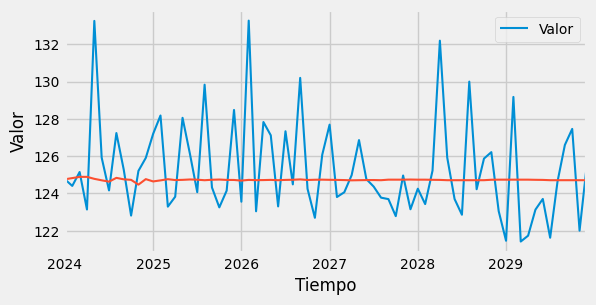

In [ ]:
backtesting_forecasterAutoreg(df11_train,df11_test,32,36)

In [ ]:
df12_train.index.freq='ME'
df12_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 175}
  Backtesting metric: 1.8977399629699134



1.8371621235451248

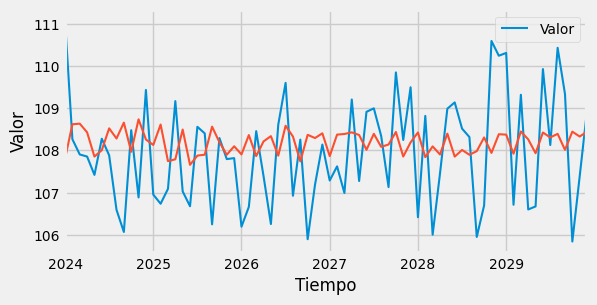

In [ ]:
backtesting_forecasterAutoreg(df12_train,df12_test,32,36)

In [ ]:
df13_train.index.freq='ME'
df13_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 250}
  Backtesting metric: 0.9575415343602943



1.169179977688855

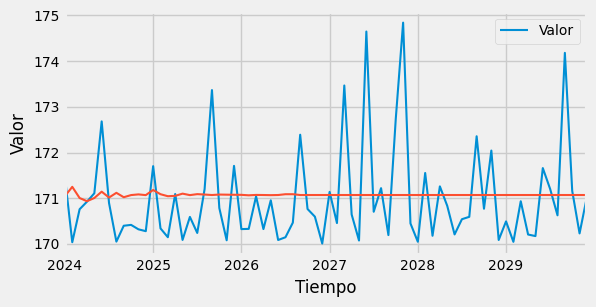

In [ ]:
backtesting_forecasterAutoreg(df13_train,df13_test,32,36)

In [ ]:
df14_train.index.freq='ME'
df14_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 450}
  Backtesting metric: 214.88556645883867



126.3877939843318

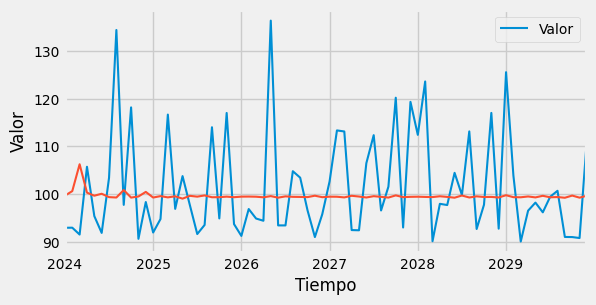

In [ ]:
backtesting_forecasterAutoreg(df14_train,df14_test,32,36)

In [ ]:
df15_train.index.freq='ME'
df15_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 15, 'n_estimators': 250}
  Backtesting metric: 1.308841715009225



1.1985773224702525

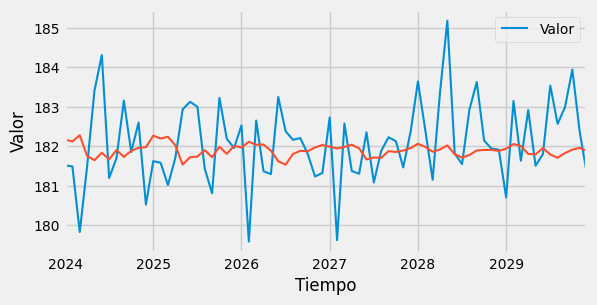

In [ ]:
backtesting_forecasterAutoreg(df15_train,df15_test,32,36)

In [ ]:
df16_train.index.freq='ME'
df16_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 250.56027791050047



197.09863628385335

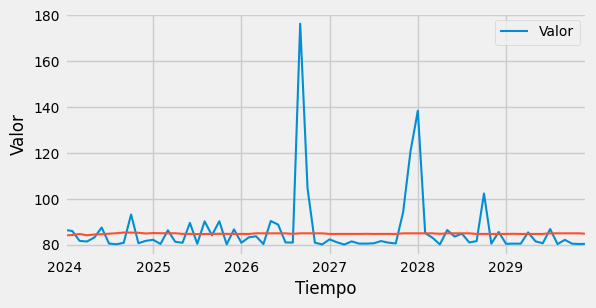

In [ ]:
backtesting_forecasterAutoreg(df16_train,df16_test,32,36)

In [ ]:
df17_train.index.freq='ME'
df17_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 16.96888700477272



9.47341320196402

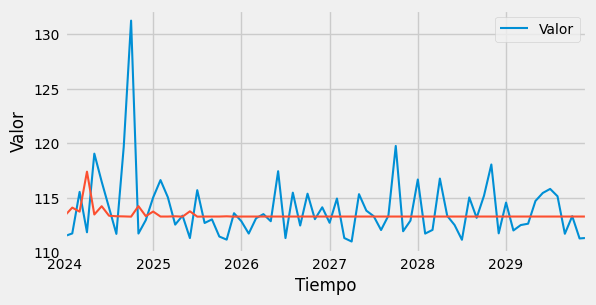

In [ ]:
backtesting_forecasterAutoreg(df17_train,df17_test,32,36)

In [ ]:
df18_train.index.freq='ME'
df18_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 47.25801600000078



71.97748266666693

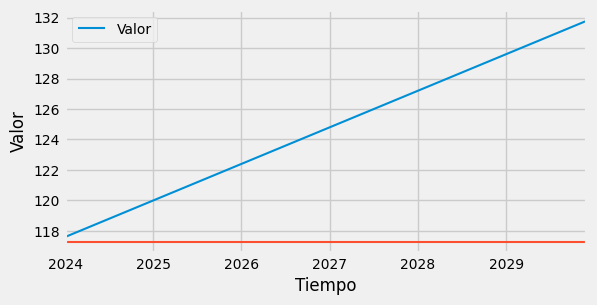

In [ ]:
backtesting_forecasterAutoreg(df18_train,df18_test,32,36)

In [ ]:
df19_train.index.freq='ME'
df19_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 425.32214400000294



458.00456622224425

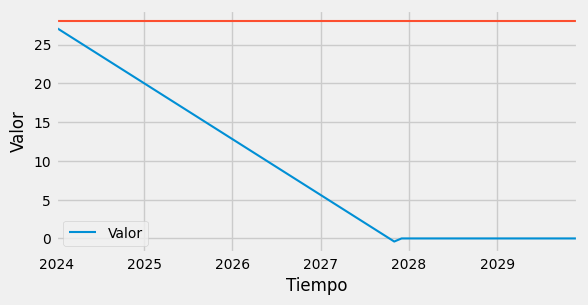

In [ ]:
backtesting_forecasterAutoreg(df19_train,df19_test,32,36)

In [ ]:
df20_train.index.freq='ME'
df20_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 53.58975218563033



83.83924814724313

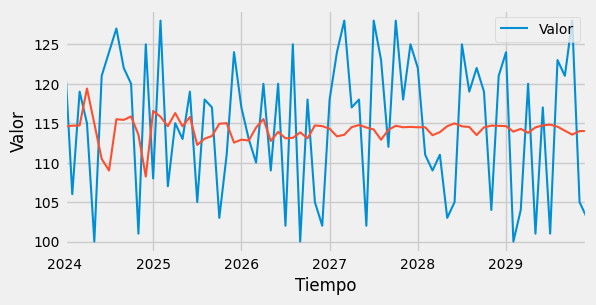

In [ ]:
backtesting_forecasterAutoreg(df20_train,df20_test,32,36)

PERIODICOS

In [ ]:
df21_train.index.freq='ME'
df21_test.index.freq='ME'

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 1.4834432483204487e-24



1.458336652860416e-24

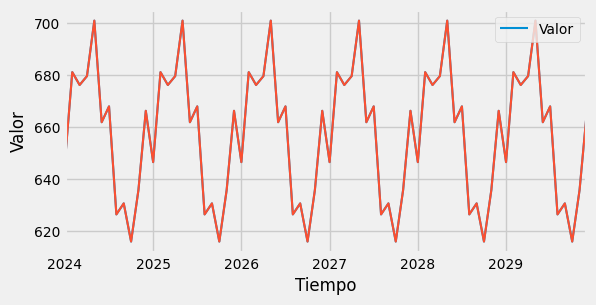

In [ ]:
backtesting_forecasterAutoreg(df21_train,df21_test,32,36)

In [ ]:
df22_train.index.freq='ME'
df22_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 15, 'n_estimators': 100}
  Backtesting metric: 1.1540863126110264e-24



1.1718392011167893e-24

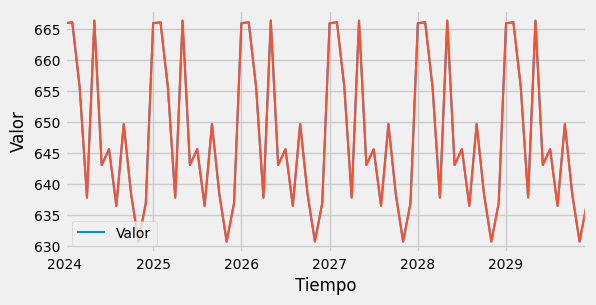

In [ ]:
backtesting_forecasterAutoreg(df22_train,df22_test,32,36)

In [ ]:
df23_train.index.freq='ME'
df23_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 8.153701135052608e-25



8.453110903889338e-25

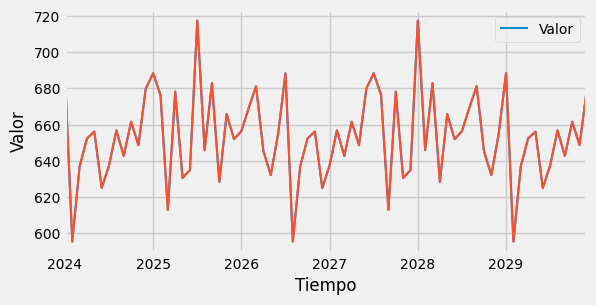

In [ ]:
backtesting_forecasterAutoreg(df23_train,df23_test,32,36)

In [ ]:
df24_train.index.freq='ME'
df24_test.index.freq='ME'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 20, 'n_estimators': 100}
  Backtesting metric: 9.591016585205365e-25



0.001163257112113388

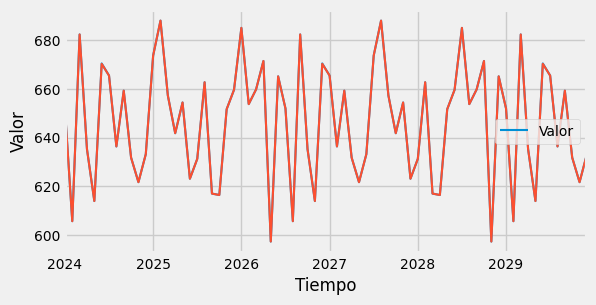

In [ ]:
backtesting_forecasterAutoreg(df24_train,df24_test,32,36)

MODELOS ARMA

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 250}
  Backtesting metric: 0.8630887121874026



0.9830741408653024

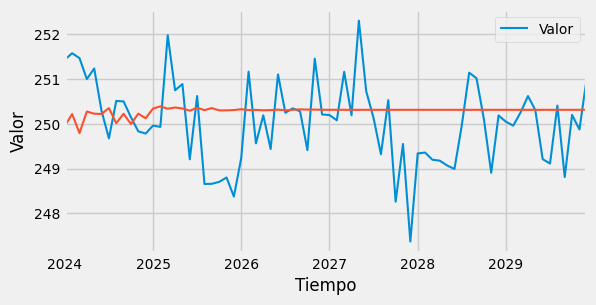

In [ ]:
backtesting_forecasterAutoreg(df25_train,df25_test,32,36)

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 15, 'n_estimators': 450}
  Backtesting metric: 2.2551298850754713



2.3125837515116974

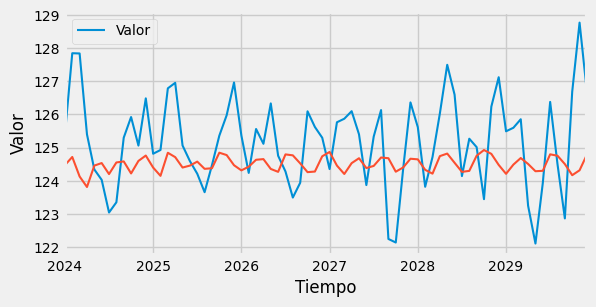

In [ ]:
backtesting_forecasterAutoreg(df26_train,df26_test,32,36)

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 175}
  Backtesting metric: 3.9758631051815403



2.6961764025818145

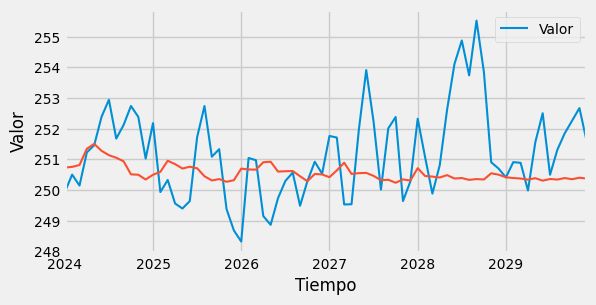

In [ ]:
backtesting_forecasterAutoreg(df27_train,df27_test,32,36)

Number of models compared: 40.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 250}
  Backtesting metric: 0.7910113598283387



0.8377287340075578

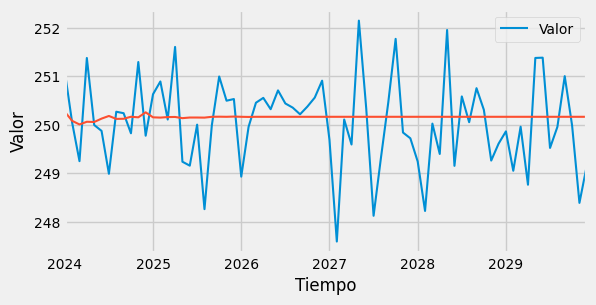

In [ ]:
backtesting_forecasterAutoreg(df28_train,df28_test,32,36)

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 450}
  Backtesting metric: 1.935922559332522



1.771226258821109

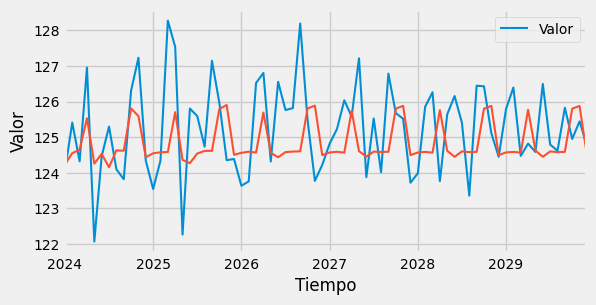

In [ ]:
backtesting_forecasterAutoreg(df29_train,df29_test,32,36)

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 450}
  Backtesting metric: 3.2545457804395146



3.1094288723007195

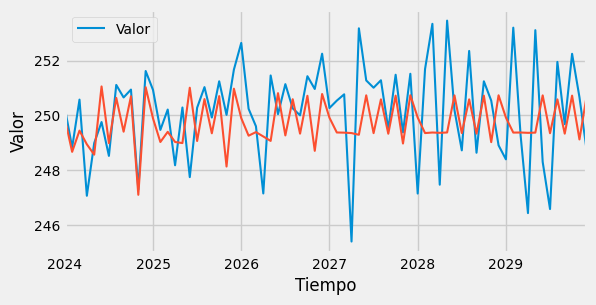

In [ ]:
backtesting_forecasterAutoreg(df30_train,df30_test,32,36)

FORECASTER AUTOREG DIRECTO

In [ ]:
from skforecast.exceptions import LongTrainingWarning
warnings.simplefilter('ignore', category=LongTrainingWarning)

In [ ]:
def backtesting_forecasterAutoregDirect(datos_train,datos_test,steps,lags):

    forecaster = ForecasterAutoregDirect(
                regressor     = Ridge(random_state=123),
                transformer_y = StandardScaler(),
                steps         = steps,
                lags          = lags
             )

    # Valores candidatos de lags
    lags_grid = [5,12, 20]

    # Valores candidatos de hiperparámetros del regresor
    param_grid = {'alpha': np.logspace(-5, 5, 10)}

    resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train[datos_train.columns[0]],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.8),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                    )

    # Predicciones
    # ==============================================================================
    predicciones = forecaster.predict()

    # Error de test
    # ==============================================================================
    error_mse = mean_squared_error(
                    y_true = datos_test,
                    y_pred = predicciones
                )

    fig, ax = plt.subplots(figsize=(6, 3))

    datos_test.plot(ax=ax,label='Valores Reales')
    predicciones.plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(datos_train.columns[0])

    return error_mse

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 0.2782559402207126}
  Backtesting metric: 0.0029261199097129907



0.003561364206368383

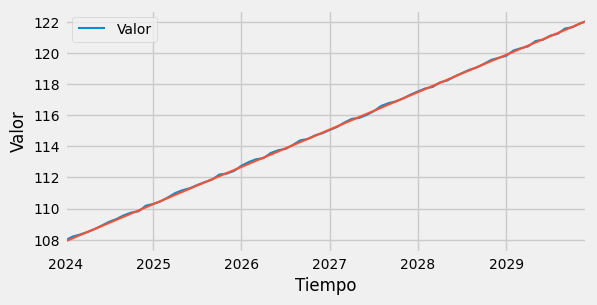

In [ ]:
backtesting_forecasterAutoregDirect(df1_train,df1_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 0.0001291549665014884}
  Backtesting metric: 83564715882504.84



307153104551190.5

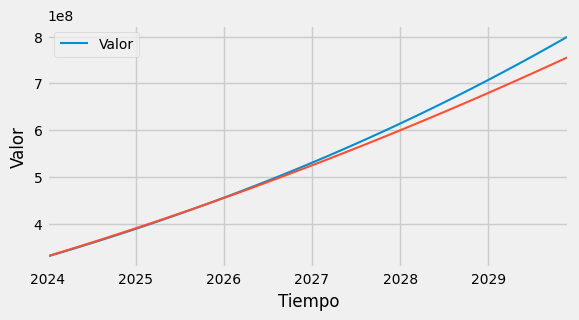

In [ ]:
backtesting_forecasterAutoregDirect(df2_train,df2_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 0.0001291549665014884}
  Backtesting metric: 1.0973819018178592e-13



4.3066416072164505e-14

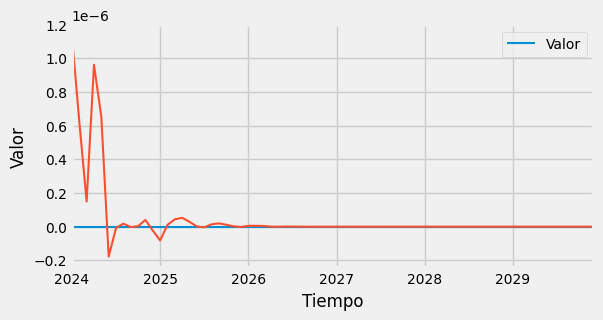

In [ ]:
backtesting_forecasterAutoregDirect(df3_train,df3_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 2.764508852030043e-05



2.2748104100991143e-05

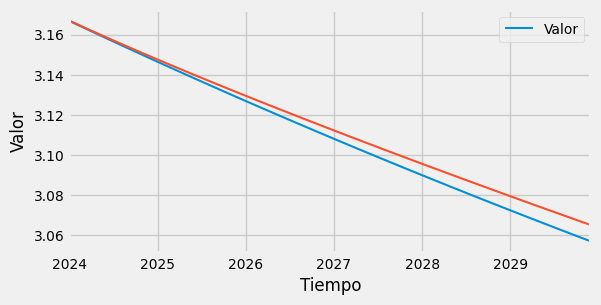

In [ ]:
backtesting_forecasterAutoregDirect(df4_train,df4_test,72,20)

DISTRIBUCIONES

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 15.792686371471259



23.9695563377157

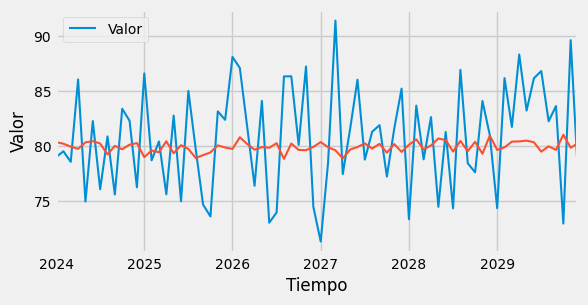

In [ ]:
backtesting_forecasterAutoregDirect(df5_train,df5_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 6.32617089025434



6.408514392559149

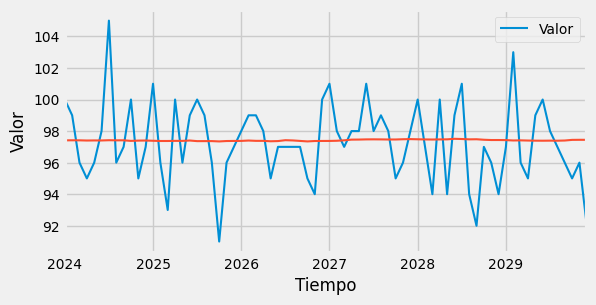

In [ ]:
backtesting_forecasterAutoregDirect(df6_train,df6_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 6.767568818929195



8.647276453447724

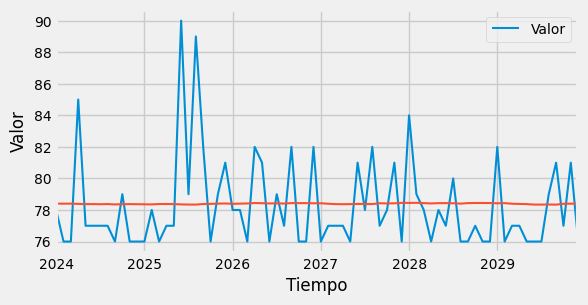

In [ ]:
backtesting_forecasterAutoregDirect(df7_train,df7_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 6.144559854243997



6.73275926267348

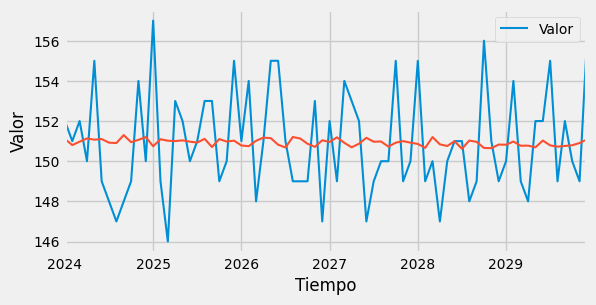

In [ ]:
backtesting_forecasterAutoregDirect(dfg_train,dfg_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 7742.636826811277}
  Backtesting metric: 3.1813598856178604



3.400487094637688

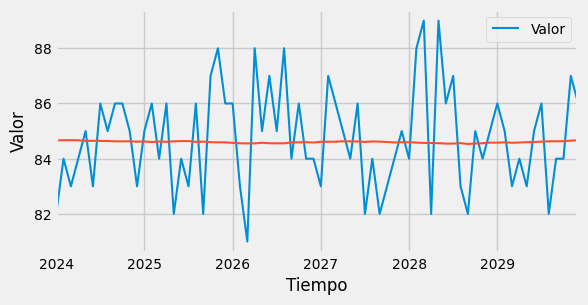

In [ ]:
backtesting_forecasterAutoregDirect(df8_train,df8_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 0.08385657770539719



0.07541915281930327

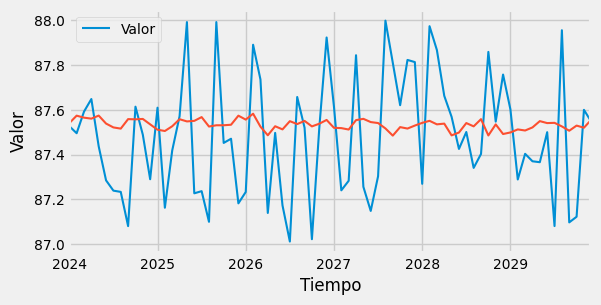

In [ ]:
backtesting_forecasterAutoregDirect(df9_train,df9_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 0.0



0.0

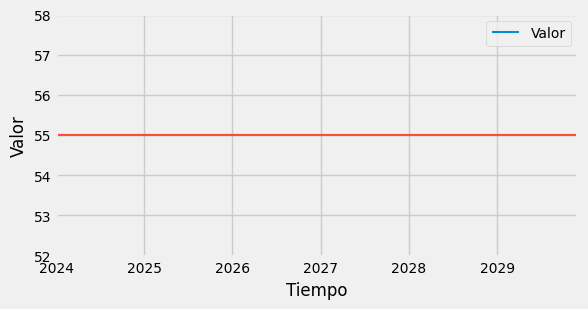

In [ ]:
backtesting_forecasterAutoregDirect(df10_train,df10_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 4.90235483962237



6.722183459244881

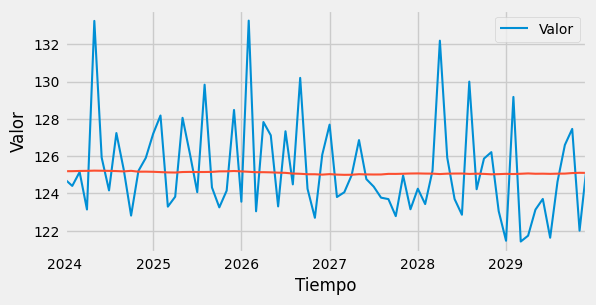

In [ ]:
backtesting_forecasterAutoregDirect(df11_train,df11_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 1.9554486606020667



1.6786892997652787

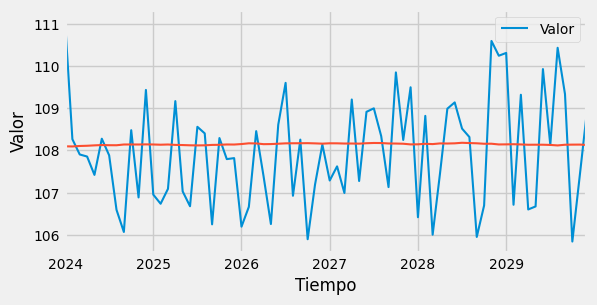

In [ ]:
backtesting_forecasterAutoregDirect(df12_train,df12_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 0.9470294750770762



1.1855125593708706

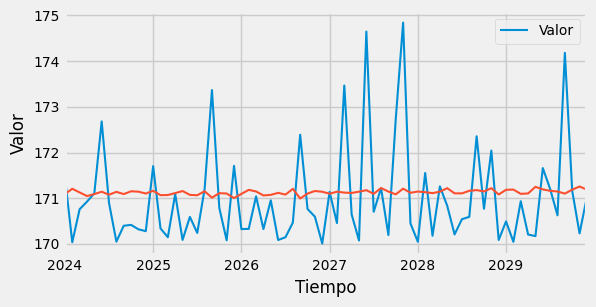

In [ ]:
backtesting_forecasterAutoregDirect(df13_train,df13_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 7742.636826811277}
  Backtesting metric: 213.14851186718332



120.19358936054722

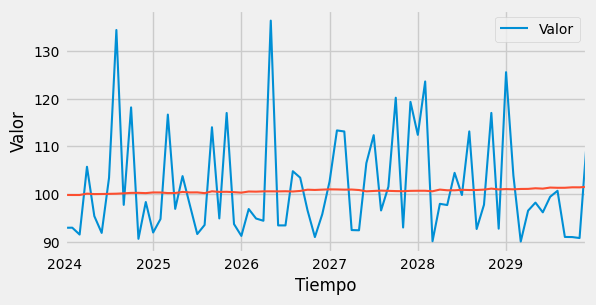

In [ ]:
backtesting_forecasterAutoregDirect(df14_train,df14_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 1.4067014827957824



1.058815774208635

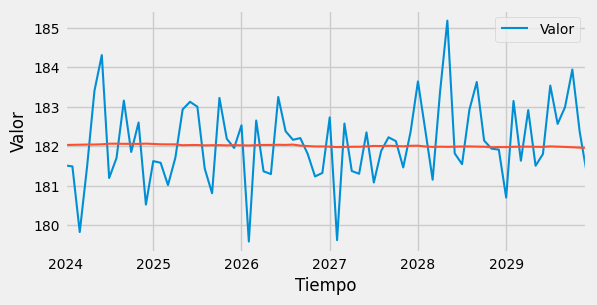

In [ ]:
backtesting_forecasterAutoregDirect(df15_train,df15_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 261.6468601669981



209.13186396137982

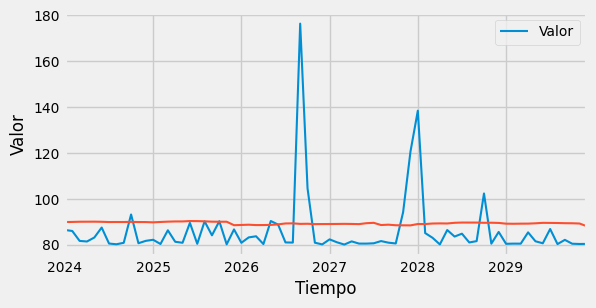

In [ ]:
backtesting_forecasterAutoregDirect(df16_train,df16_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 16.65400216134917



8.945971673969593

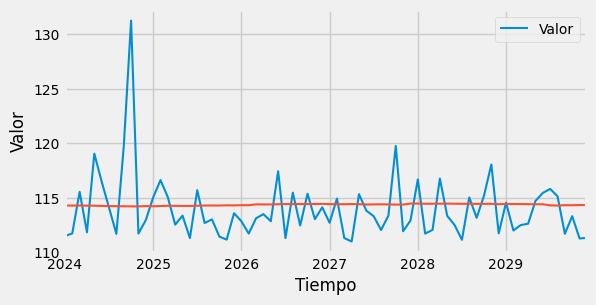

In [ ]:
backtesting_forecasterAutoregDirect(df17_train,df17_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 7.714171646917012e-14



3.401591605385685e-14

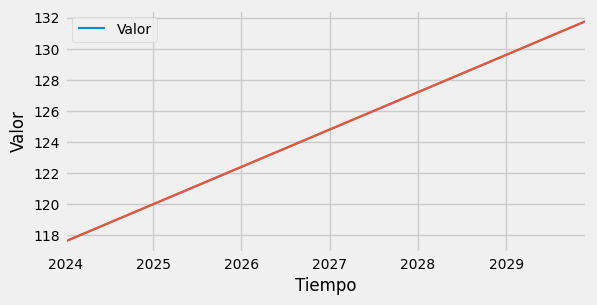

In [ ]:
backtesting_forecasterAutoregDirect(df18_train,df18_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 6.942758071255019e-13



29.84721907146583

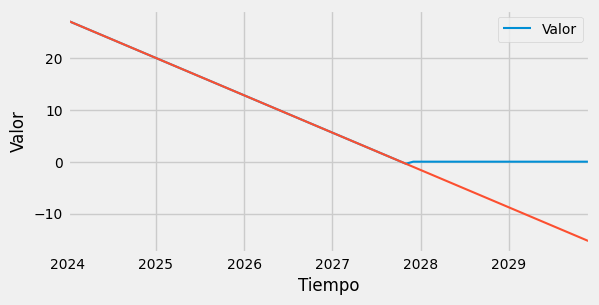

In [ ]:
backtesting_forecasterAutoregDirect(df19_train,df19_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 58.49153319158676



78.43690074999547

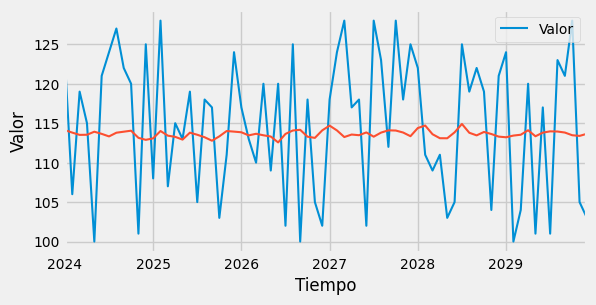

In [ ]:
backtesting_forecasterAutoregDirect(df20_train,df20_test,72,20)

MODELOS PERIÓDICOS

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 1.1853497391324109e-11



5.143066099317511e-12

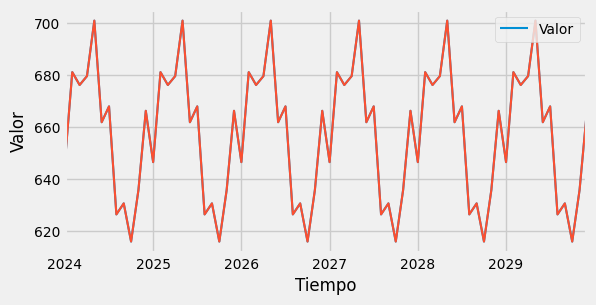

In [ ]:
backtesting_forecasterAutoregDirect(df21_train,df21_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 1.359398466372292e-12



5.43215735156301e-13

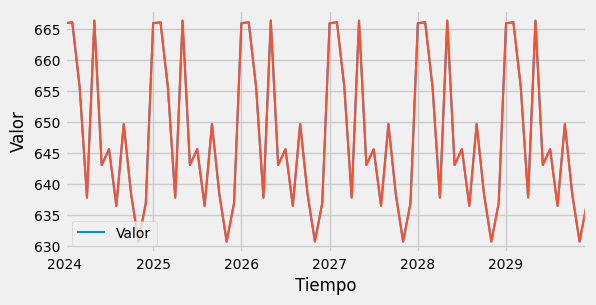

In [ ]:
backtesting_forecasterAutoregDirect(df22_train,df22_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 3.593813663804626}
  Backtesting metric: 52.16032413344409



224.5535460971874

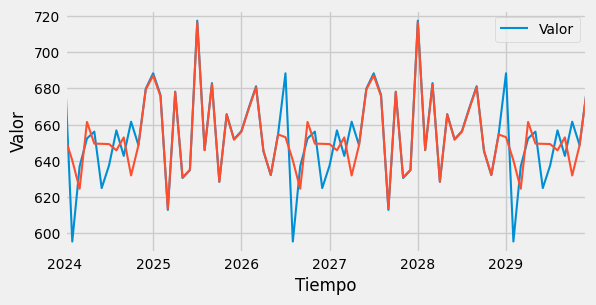

In [ ]:
backtesting_forecasterAutoregDirect(df23_train,df23_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 3.593813663804626}
  Backtesting metric: 46.89214388807089



45.37943320989413

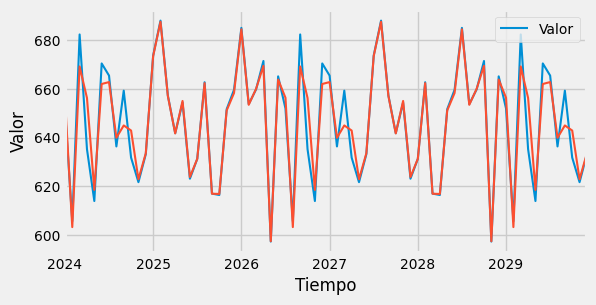

In [ ]:
backtesting_forecasterAutoregDirect(df24_train,df24_test,72,20)

MODELOS ARMA

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 100000.0}
  Backtesting metric: 0.8187844743489581



0.8962931770196527

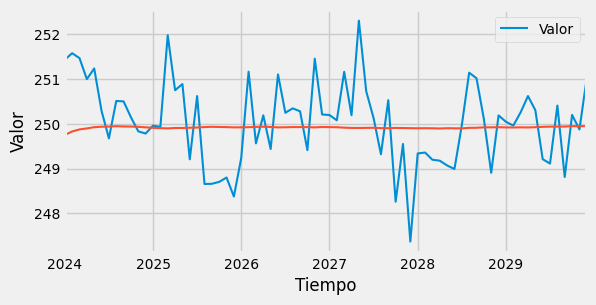

In [ ]:
backtesting_forecasterAutoregDirect(df25_train,df25_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 7742.636826811277}
  Backtesting metric: 1.9759757209829862



1.9418836495949021

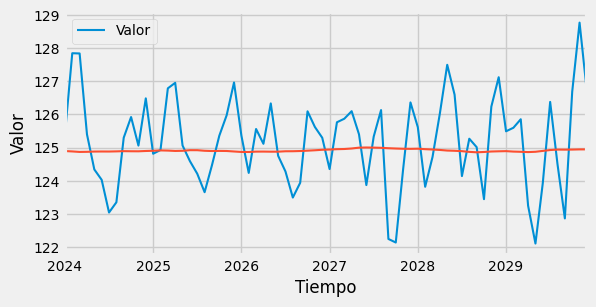

In [ ]:
backtesting_forecasterAutoregDirect(df26_train,df26_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 599.4842503189421}
  Backtesting metric: 3.81671578957157



3.802397194630019

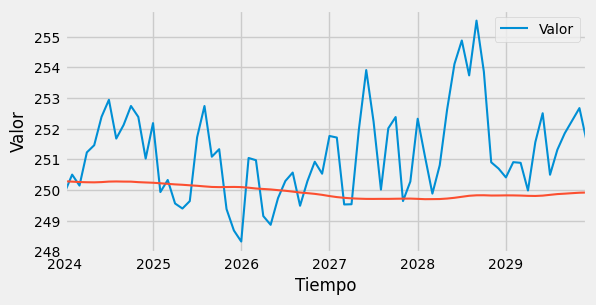

In [ ]:
backtesting_forecasterAutoregDirect(df27_train,df27_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 3.593813663804626}
  Backtesting metric: 0.7156928278457573



1.150902749028275

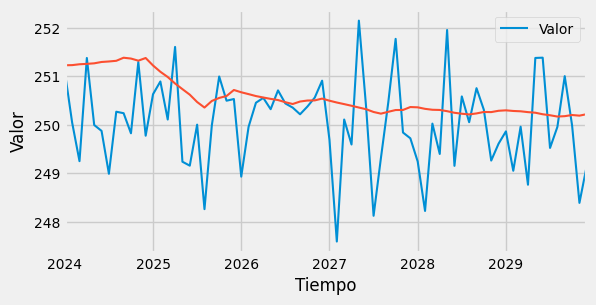

In [ ]:
backtesting_forecasterAutoregDirect(df28_train,df28_test,72,20)

Number of models compared: 30.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'alpha': 46.41588833612782}
  Backtesting metric: 1.8167706011658278



1.727714125292029

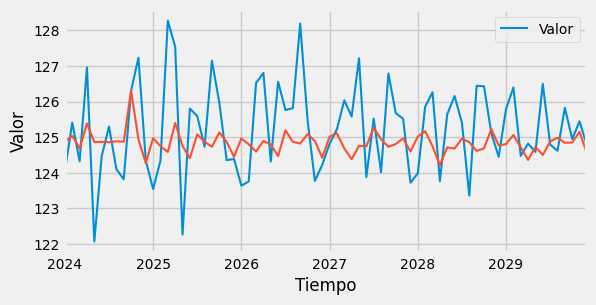

In [ ]:
backtesting_forecasterAutoregDirect(df29_train,df29_test,72,20)

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'alpha': 1e-05}
  Backtesting metric: 3.8501570968843466



2.7072626205276618

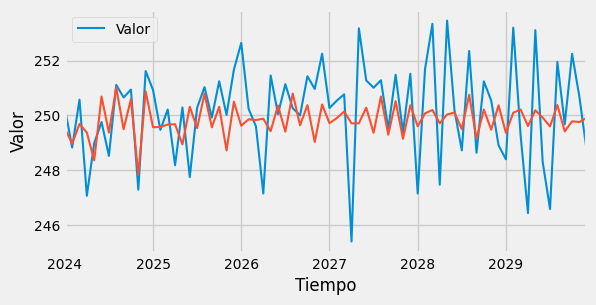

In [ ]:
backtesting_forecasterAutoregDirect(df30_train,df30_test,72,20)

RNN con recurrent layer RNN

In [ ]:
def rnn_2 (data_train,levels,steps,lags):
    model = create_and_compile_model(
        series=data_train,
        levels=levels,
        lags=lags,
        steps=steps,
        recurrent_layer="RNN",
        recurrent_units=4,
        dense_units=16,
        optimizer=Adam(learning_rate=0.01),
        loss=MeanSquaredError()
    )
    return model

In [ ]:
def forecaster_rnn_2(data_train,levels,steps,lags,epochs,batch_size,data_val):
    forecaster = ForecasterRnn(
        regressor=rnn_2(data_train,levels,steps,lags),
        levels=levels,
        transformer_series=MinMaxScaler(),
        fit_kwargs={
            "epochs": epochs,  # Número de épocas para entrenar el modelo.
            "batch_size": batch_size,  # Tamaño del batch para entrenar el modelo.
            "callbacks": [
                EarlyStopping(monitor="val_loss", patience=5)
            ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
            "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
        },
    )
    forecaster.fit(data_train)
    return forecaster

In [ ]:
def backtesting_rnn_2(data,data_train,data_val,levels,steps,lags,epochs,batch_size,end_validation):

    forecaster = forecaster_rnn_2(data_train,levels,steps,lags,epochs,batch_size,data_val)
    metrics, predictions = backtesting_forecaster_multiseries(
        forecaster=forecaster,
        steps=forecaster.max_step,
        series=data,
        levels=forecaster.levels,
        initial_train_size=len(data_train), # Datos de entrenamiento + validación
        metric='mean_squared_error',
        verbose=False,
        refit=False,
    )

    fig, ax = plt.subplots(figsize=(6, 3))

    ax = data_val.plot(ax=ax,label='Valores Reales')
    predictions.plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(data.columns[0])

    plt.legend()
    plt.show()
    return metrics.loc[0, 'mean_squared_error']

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2502 - val_loss: 0.0564
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - val_loss: 0.0118
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - val_loss: 0.0190
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - val_loss: 0.0054
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0052
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1568e-04 - val_loss: 0.0042
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7048e-04 - val_loss: 0.0050
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.6576e-04 - val_loss: 0.0052
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1156e-04 - val_loss: 0.0046
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8121e-05 - val_loss: 0.0047
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5350e-05 - val_loss: 0.0049
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5123e-05 - val_loss: 0.0050


  0%|          | 0/8 [00:00<?, ?it/s]

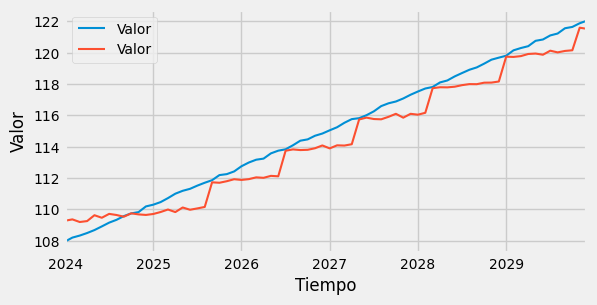

0.8970427448985632

In [ ]:
backtesting_rnn_2(df1,df1_train,df1_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0870 - val_loss: 0.1851
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0484 - val_loss: 0.0596
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - val_loss: 0.0294
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - val_loss: 0.0085
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - val_loss: 0.0057
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6195e-04 - val_loss: 0.0032
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8205e-04 - val_loss: 0.0021
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.4795e-04 - val_loss: 0.0016
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6440e-05 - val_loss: 0.0020
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3258e-05 - val_loss: 0.0021
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5875e-05 - val_loss: 0.0019
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2255e-05 - val_loss: 0.0018


  0%|          | 0/8 [00:00<?, ?it/s]

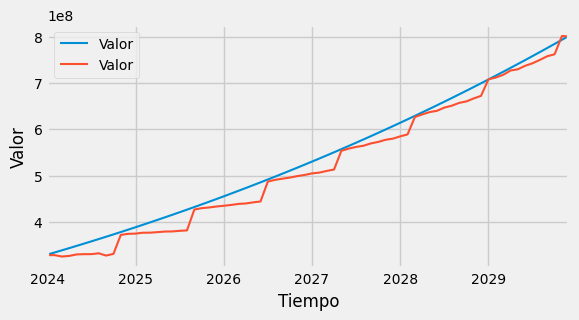

482490994764720.3

In [ ]:
backtesting_rnn_2(df2,df2_train,df2_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.1330e-05 - val_loss: 7.1898e-06
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.9606e-06 - val_loss: 6.1343e-06
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5721e-06 - val_loss: 2.7639e-06
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8587e-06 - val_loss: 6.1633e-07
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3805e-07 - val_loss: 4.3129e-07
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3306e-07 - val_loss: 1.6351e-07
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1169e-07 - val_loss: 1.0247e-07
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0755e-07 - val_loss: 1.5096e-08


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.8085e-08 - val_loss: 2.4040e-08
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0482e-07 - val_loss: 6.5166e-09
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3563e-07 - val_loss: 1.8750e-08
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9312e-08 - val_loss: 1.3790e-08
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0148e-07 - val_loss: 4.6571e-09
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4515e-07 - val_loss: 5.5469e-09
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6983e-08 - val_loss: 1.0745e-08
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5422e-07 - val_loss: 4.5907e-09


  0%|          | 0/8 [00:00<?, ?it/s]

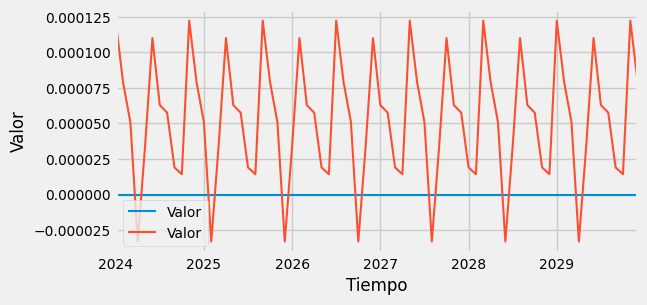

4.7572950086237315e-09

In [ ]:
backtesting_rnn_2(df3,df3_train,df3_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0209 - val_loss: 0.0389
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - val_loss: 0.0211
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043 - val_loss: 0.0089
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.2660e-04 - val_loss: 0.0049
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5494e-04 - val_loss: 0.0030
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8873e-05 - val_loss: 0.0035
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0289e-05 - val_loss: 0.0031


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 2.4959e-05 - val_loss: 0.0034
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4742e-05 - val_loss: 0.0033
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7073e-06 - val_loss: 0.0032
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1118e-06 - val_loss: 0.0032
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3339e-06 - val_loss: 0.0030
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7793e-06 - val_loss: 0.0032
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6020e-06 - val_loss: 0.0030
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9649e-06 - val_loss: 0.0030


  0%|          | 0/8 [00:00<?, ?it/s]

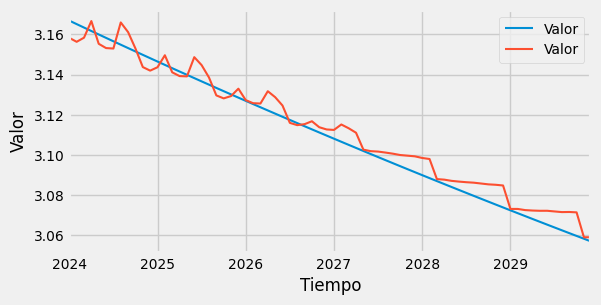

3.543271481150822e-05

In [ ]:
backtesting_rnn_2(df4,df4_train,df4_test,[columna],10,20,8,30,144)

DISTRIBUCIONES

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.5466 - val_loss: 0.2039
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1629 - val_loss: 0.1204
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0751 - val_loss: 0.0723
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - val_loss: 0.0683
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - val_loss: 0.0667
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - val_loss: 0.0649
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - val_loss: 0.0642
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - val_loss: 0.0638
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0371 - val_loss: 0.0635
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0371 - val_loss: 0.0632
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0370 - val_loss: 0.0630
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0362 - val_loss: 0.0627
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0357 - val_loss: 0.0625
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0350 - val_loss: 0.0623
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0356 - val_loss: 0.0622
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0365 - val_loss: 0.0620


  0%|          | 0/8 [00:00<?, ?it/s]

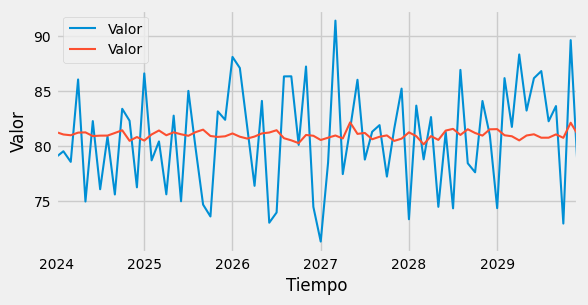

23.044091880722466

In [ ]:
backtesting_rnn_2(df5,df5_train,df5_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.3925 - val_loss: 0.1733
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1162 - val_loss: 0.0845
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0544 - val_loss: 0.0717
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0434 - val_loss: 0.0681
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0392 - val_loss: 0.0675
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0393 - val_loss: 0.0656
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0374 - val_loss: 0.0650
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - val_loss: 0.0644


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0370 - val_loss: 0.0639
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - val_loss: 0.0635
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0632
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - val_loss: 0.0629
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - val_loss: 0.0626
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - val_loss: 0.0625
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - val_loss: 0.0622
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - val_loss: 0.0621


  0%|          | 0/8 [00:00<?, ?it/s]

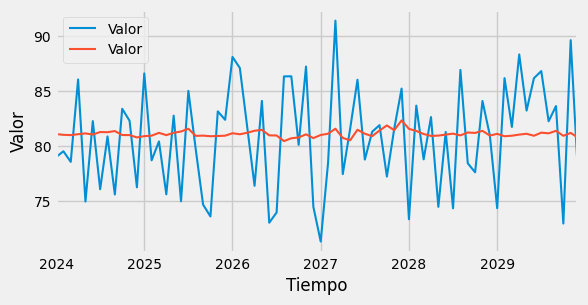

22.46888224349631

In [ ]:
backtesting_rnn_2(df6,df6_train,df6_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.3759 - val_loss: 0.0895
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0826 - val_loss: 0.0429
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0434 - val_loss: 0.0444
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 - val_loss: 0.0332
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0336 - val_loss: 0.0305
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0292 - val_loss: 0.0324
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0293 - val_loss: 0.0314
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0284 - val_loss: 0.0298


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0284 - val_loss: 0.0311
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0274 - val_loss: 0.0304
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - val_loss: 0.0304
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271 - val_loss: 0.0304
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0285 - val_loss: 0.0304


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.42857143 0.57142857 0.28571429 0.42857143 0.42857143 0.42857143
 0.21428571 0.57142857 0.57142857 0.28571429 0.42857143 0.35714286
 0.21428571 0.42857143 0.42857143 0.42857143 0.57142857 0.78571429
 0.57142857 0.28571429]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.42857143 0.35714286 0.21428571 0.42857143 0.42857143 0.42857143
 0.57142857 0.78571429 0.57142857 0.28571429 0.64285714 0.57142857
 0.35714286 0.28571429 0.35714286 0.5        1.         0.35714286
 0.42857143 0.64285714]' has dtype incompatible with int64, please explic

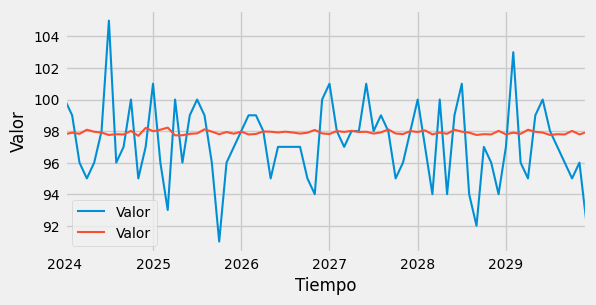

6.845259480736179

In [ ]:
backtesting_rnn_2(df7,df7_train,df7_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1002 - val_loss: 0.0375
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - val_loss: 0.0307
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0308 - val_loss: 0.0290
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - val_loss: 0.0277
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - val_loss: 0.0276
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - val_loss: 0.0278
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - val_loss: 0.0277
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - val_loss: 0.0276
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0280 - val_loss: 0.0275
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0275 - val_loss: 0.0275
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - val_loss: 0.0274
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280 - val_loss: 0.0275
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0276
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.0274
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - val_loss: 0.0275
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.0275


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.21428571 0.07142857 0.42857143 0.         0.42857143 0.14285714
 0.28571429 0.         0.14285714 0.14285714 0.14285714 0.
 0.         0.         0.         0.5        0.         0.78571429
 0.14285714 0.07142857]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.14285714 0.         0.         0.         0.         0.5
 0.         0.78571429 0.14285714 0.07142857 0.14285714 0.
 0.         0.64285714 0.07142857 0.07142857 0.07142857 0.07142857
 0.         0.21428571]' has dtype incompatible with int64, please explicitly cast to a compatib

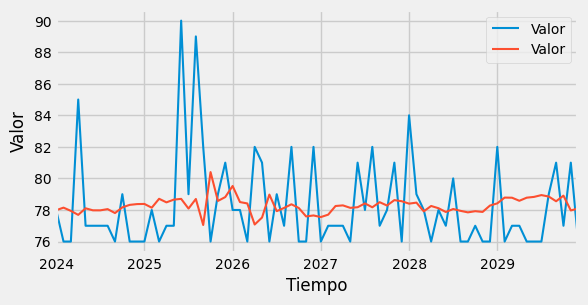

9.132308759886655

In [ ]:
backtesting_rnn_2(dfg,dfg_train,dfg_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2370 - val_loss: 0.0938
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0647 - val_loss: 0.0736
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0458 - val_loss: 0.0710
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - val_loss: 0.0685
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - val_loss: 0.0666
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - val_loss: 0.0661
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - val_loss: 0.0660
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - val_loss: 0.0646
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0399 - val_loss: 0.0648
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - val_loss: 0.0647
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - val_loss: 0.0638
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - val_loss: 0.0641
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - val_loss: 0.0632
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - val_loss: 0.0634
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - val_loss: 0.0629
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - val_loss: 0.0633


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.125 0.5   0.5   0.5   0.25  0.625 0.875 0.375 0.875 0.25  0.    0.375
 0.5   0.5   0.625 0.375 0.625 0.25  0.625 0.5  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.    0.375 0.5   0.5   0.625 0.375 0.625 0.25  0.625 0.5   0.125 0.375
 0.25  0.375 0.5   0.25  0.625 0.5   0.625 0.625]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:730: FutureWarning:

Setting an item of incompatible dtype is deprecated and will 

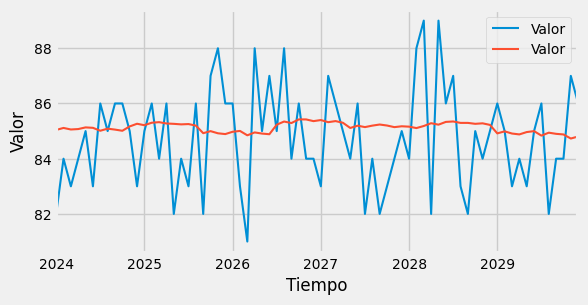

3.5542927807036904

In [ ]:
backtesting_rnn_2(df8,df8_train,df8_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.4212 - val_loss: 0.1838
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1689 - val_loss: 0.0990
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1015 - val_loss: 0.0864
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0872 - val_loss: 0.0791
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0868 - val_loss: 0.0795
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0821 - val_loss: 0.0777
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0851 - val_loss: 0.0791
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0851 - val_loss: 0.0776
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0826 - val_loss: 0.0777
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835 - val_loss: 0.0781
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0835 - val_loss: 0.0777
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0833 - val_loss: 0.0784
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0843 - val_loss: 0.0780


  0%|          | 0/8 [00:00<?, ?it/s]

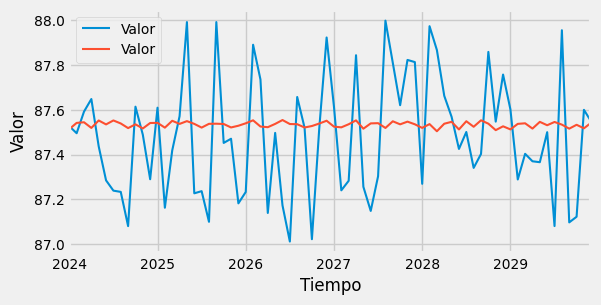

0.07405196450604665

In [ ]:
backtesting_rnn_2(df9,df9_train,df9_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


  0%|          | 0/8 [00:00<?, ?it/s]

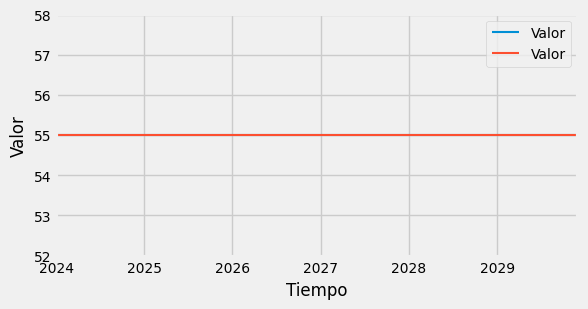

0.0

In [ ]:
backtesting_rnn_2(df10,df10_train,df10_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1585 - val_loss: 0.0965
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1044 - val_loss: 0.0669
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0719 - val_loss: 0.0523
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0531 - val_loss: 0.0481
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0472 - val_loss: 0.0488
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0440 - val_loss: 0.0502
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0448 - val_loss: 0.0510
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0452 - val_loss: 0.0509


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0458 - val_loss: 0.0504
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0468 - val_loss: 0.0500
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0466 - val_loss: 0.0497
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0463 - val_loss: 0.0497
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0444 - val_loss: 0.0497


  0%|          | 0/8 [00:00<?, ?it/s]

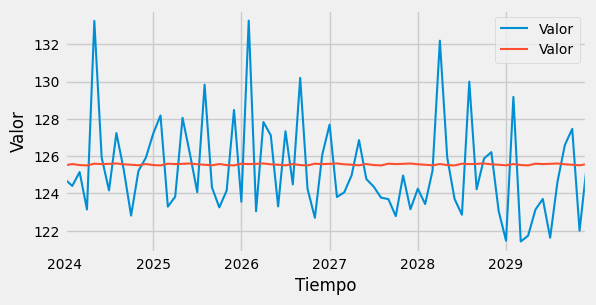

6.788766967574056

In [ ]:
backtesting_rnn_2(df11,df11_train,df11_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.0471 - val_loss: 0.1539
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1349 - val_loss: 0.1219
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0982 - val_loss: 0.0998
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0804 - val_loss: 0.0854
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0642 - val_loss: 0.0754
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0557 - val_loss: 0.0700
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0513 - val_loss: 0.0680
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0492 - val_loss: 0.0675
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0492 - val_loss: 0.0672
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - val_loss: 0.0668
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0486 - val_loss: 0.0664
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0491 - val_loss: 0.0662
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - val_loss: 0.0662
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0481 - val_loss: 0.0658
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0474 - val_loss: 0.0656
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0476 - val_loss: 0.0657


  0%|          | 0/8 [00:00<?, ?it/s]

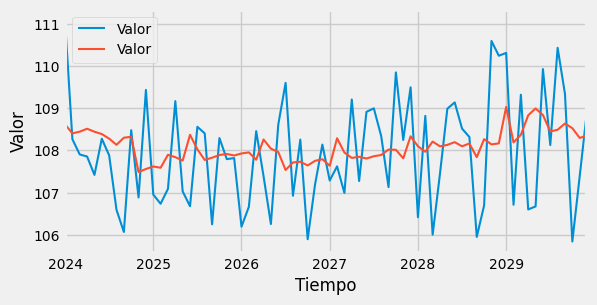

1.6091461410733916

In [ ]:
backtesting_rnn_2(df12,df12_train,df12_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0678 - val_loss: 0.0664
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0387 - val_loss: 0.0604
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0374 - val_loss: 0.0604
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0340 - val_loss: 0.0603
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0352 - val_loss: 0.0602
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0358 - val_loss: 0.0604
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0363 - val_loss: 0.0602
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0347 - val_loss: 0.0603


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0351 - val_loss: 0.0603
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - val_loss: 0.0602
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - val_loss: 0.0602
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - val_loss: 0.0605
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - val_loss: 0.0603


  0%|          | 0/8 [00:00<?, ?it/s]

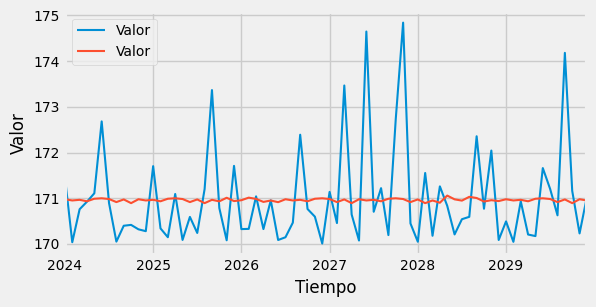

1.1535756746527472

In [ ]:
backtesting_rnn_2(df13,df13_train,df13_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0420 - val_loss: 0.0757
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242 - val_loss: 0.0654
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0217 - val_loss: 0.0688
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - val_loss: 0.0683
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - val_loss: 0.0702
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0231 - val_loss: 0.0688
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - val_loss: 0.0688
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0219 - val_loss: 0.0693
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - val_loss: 0.0690
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - val_loss: 0.0690
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - val_loss: 0.0688
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - val_loss: 0.0696


  0%|          | 0/8 [00:00<?, ?it/s]

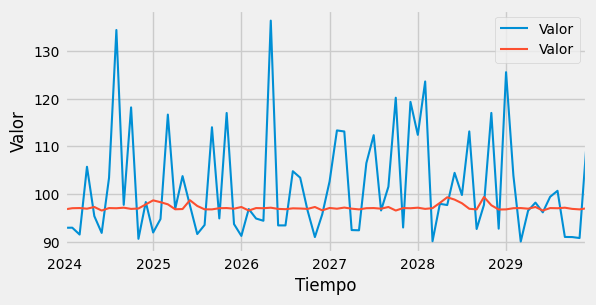

139.3415516385572

In [ ]:
backtesting_rnn_2(df14,df14_train,df14_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.2064 - val_loss: 0.0509
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0369 - val_loss: 0.0443
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0287 - val_loss: 0.0391
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - val_loss: 0.0359
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - val_loss: 0.0363
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - val_loss: 0.0355
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - val_loss: 0.0355
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0204 - val_loss: 0.0351
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0198 - val_loss: 0.0349
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - val_loss: 0.0351
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - val_loss: 0.0355
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197 - val_loss: 0.0346
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - val_loss: 0.0352
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 - val_loss: 0.0346
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0189 - val_loss: 0.0349
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0190 - val_loss: 0.0346


  0%|          | 0/8 [00:00<?, ?it/s]

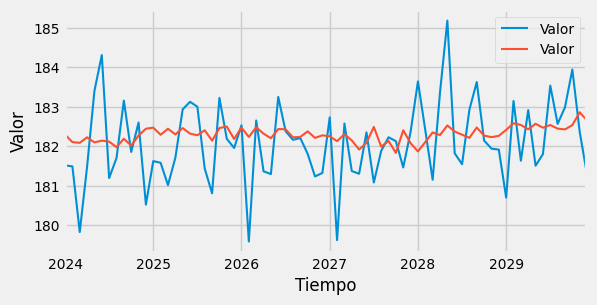

1.063834640080935

In [ ]:
backtesting_rnn_2(df15,df15_train,df15_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0111 - val_loss: 0.0372
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0360
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.0362
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_loss: 0.0363
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0362
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0363
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0361
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - val_loss: 0.0362
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.0360
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116 - val_loss: 0.0362
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - val_loss: 0.0365
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089 - val_loss: 0.0359
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0101 - val_loss: 0.0368
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0098 - val_loss: 0.0358
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093 - val_loss: 0.0365


  0%|          | 0/8 [00:00<?, ?it/s]

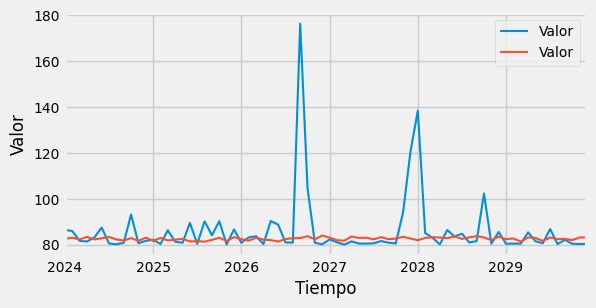

208.17269543452065

In [ ]:
backtesting_rnn_2(df16,df16_train,df16_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0163 - val_loss: 0.0139
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0141
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - val_loss: 0.0150
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - val_loss: 0.0151
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - val_loss: 0.0143
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - val_loss: 0.0146
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0136 - val_loss: 0.0151
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0142
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - val_loss: 0.0145
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - val_loss: 0.0149


  0%|          | 0/8 [00:00<?, ?it/s]

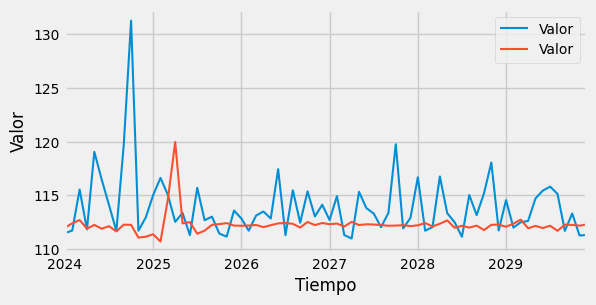

12.675891698403497

In [ ]:
backtesting_rnn_2(df17,df17_train,df17_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.2570 - val_loss: 0.0854
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0493 - val_loss: 0.0110
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - val_loss: 0.0220
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - val_loss: 0.0260
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030 - val_loss: 0.0241
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 0.0172
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1237e-04 - val_loss: 0.0156


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.1314e-04 - val_loss: 0.0158
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0278e-04 - val_loss: 0.0173
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4676e-04 - val_loss: 0.0165
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6125e-05 - val_loss: 0.0173
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7486e-05 - val_loss: 0.0170


  0%|          | 0/8 [00:00<?, ?it/s]

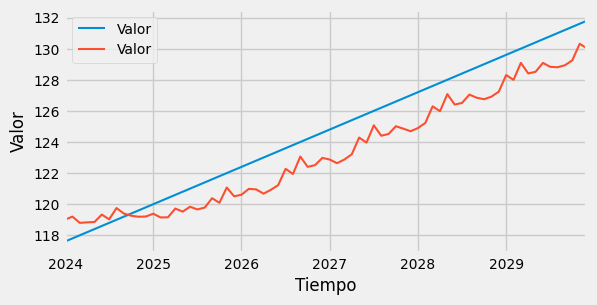

2.6805042912159927

In [ ]:
backtesting_rnn_2(df18,df18_train,df18_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.1797 - val_loss: 0.0181
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0263
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - val_loss: 0.0236
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0203
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - val_loss: 0.0162
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0138
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0124
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2176e-04 - val_loss: 0.0115
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.5346e-04 - val_loss: 0.0114
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5170e-04 - val_loss: 0.0110
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7830e-04 - val_loss: 0.0104
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0342e-04 - val_loss: 0.0103
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5613e-04 - val_loss: 0.0099
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0525e-04 - val_loss: 0.0099
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0985e-05 - val_loss: 0.0095
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5906e-05 - val_loss: 0.0094


  0%|          | 0/8 [00:00<?, ?it/s]

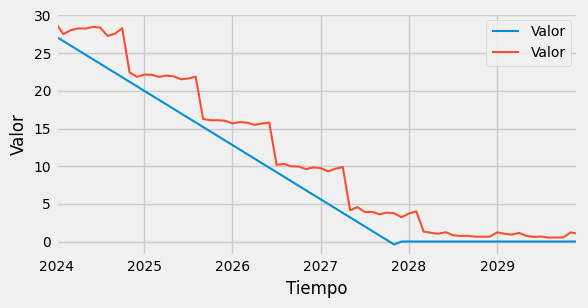

9.516515380558006

In [ ]:
backtesting_rnn_2(df19,df19_train,df19_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2847 - val_loss: 0.2123
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1359 - val_loss: 0.1293
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1037 - val_loss: 0.1125
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0888 - val_loss: 0.1127
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0853 - val_loss: 0.1088
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0850 - val_loss: 0.1069
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0853 - val_loss: 0.1068
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0830 - val_loss: 0.1070
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0832 - val_loss: 0.1067
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0810 - val_loss: 0.1067
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835 - val_loss: 0.1069
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - val_loss: 0.1057
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0846 - val_loss: 0.1062
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0840 - val_loss: 0.1067
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0839 - val_loss: 0.1051
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0834 - val_loss: 0.1066


  0%|          | 0/8 [00:00<?, ?it/s]

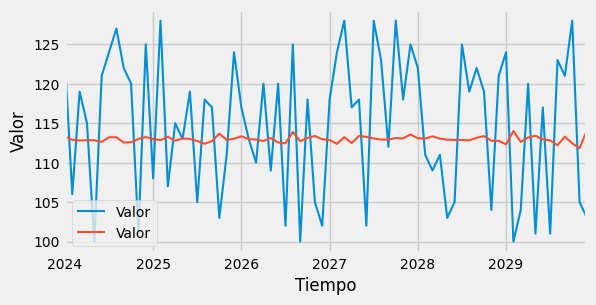

81.89047804623907

In [ ]:
backtesting_rnn_2(df20,df20_train,df20_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2731 - val_loss: 0.1572
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1370 - val_loss: 0.0928
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0886 - val_loss: 0.0749
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0742 - val_loss: 0.0705
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0672 - val_loss: 0.0638
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0613 - val_loss: 0.0598
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0615 - val_loss: 0.0554
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - val_loss: 0.0484
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0464 - val_loss: 0.0373
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0361 - val_loss: 0.0304
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299 - val_loss: 0.0265
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264 - val_loss: 0.0246
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - val_loss: 0.0237
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - val_loss: 0.0231
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0225
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - val_loss: 0.0220


  0%|          | 0/8 [00:00<?, ?it/s]

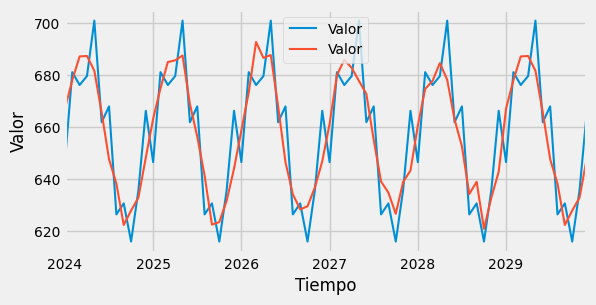

158.38927092197457

In [ ]:
backtesting_rnn_2(df21,df21_train,df21_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3180 - val_loss: 0.1809
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1616 - val_loss: 0.1368
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1349 - val_loss: 0.1213
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1200 - val_loss: 0.1201
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1196 - val_loss: 0.1160
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1171 - val_loss: 0.1132
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1124 - val_loss: 0.1092
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1093 - val_loss: 0.1046
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1068 - val_loss: 0.1004
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1018 - val_loss: 0.0968
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0993 - val_loss: 0.0936
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0952 - val_loss: 0.0912
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0910 - val_loss: 0.0890
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0897 - val_loss: 0.0864
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0860 - val_loss: 0.0837
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - val_loss: 0.0815


  0%|          | 0/8 [00:00<?, ?it/s]

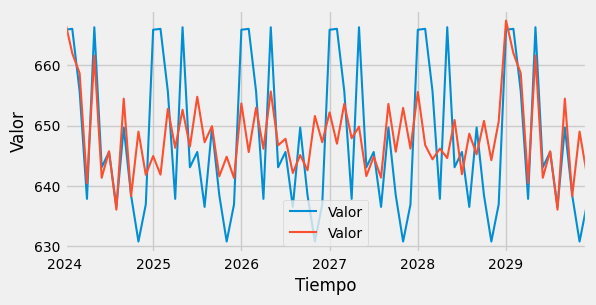

103.9696341955228

In [ ]:
backtesting_rnn_2(df22,df22_train,df22_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.2431 - val_loss: 0.1007
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0868 - val_loss: 0.0579
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - val_loss: 0.0469
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0476 - val_loss: 0.0444
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0445 - val_loss: 0.0426
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - val_loss: 0.0418
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - val_loss: 0.0418
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - val_loss: 0.0414
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0422 - val_loss: 0.0412
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - val_loss: 0.0409
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - val_loss: 0.0409
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - val_loss: 0.0407
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - val_loss: 0.0405
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - val_loss: 0.0404
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - val_loss: 0.0404
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - val_loss: 0.0401


  0%|          | 0/8 [00:00<?, ?it/s]

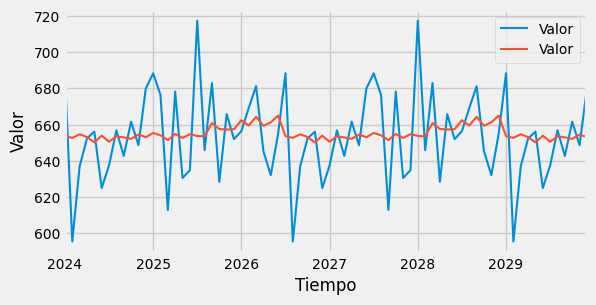

606.7593709019325

In [ ]:
backtesting_rnn_2(df23,df23_train,df23_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3352 - val_loss: 0.2005
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1594 - val_loss: 0.1090
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0940 - val_loss: 0.0835
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0772 - val_loss: 0.0828
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0751 - val_loss: 0.0774
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0714 - val_loss: 0.0749
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - val_loss: 0.0737
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0682 - val_loss: 0.0723
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:1125: UserWarning:

Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0668 - val_loss: 0.0706
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0632 - val_loss: 0.0687
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0641 - val_loss: 0.0662
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0623 - val_loss: 0.0633
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0605 - val_loss: 0.0614
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0576 - val_loss: 0.0592
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - val_loss: 0.0574
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - val_loss: 0.0557


  0%|          | 0/8 [00:00<?, ?it/s]

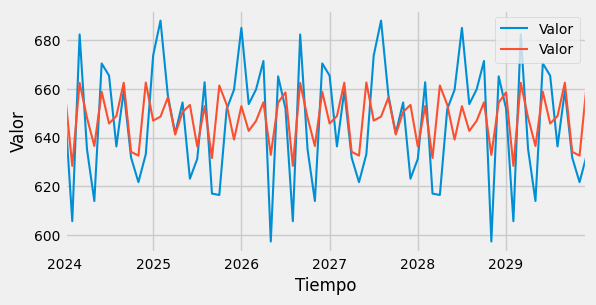

387.7034908667379

In [ ]:
backtesting_rnn_2(df24,df24_train,df24_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.6359 - val_loss: 0.0911
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - val_loss: 0.1295
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - val_loss: 0.0798
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - val_loss: 0.0925
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0872
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0828
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1985e-04 - val_loss: 0.0891
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5957e-04 - val_loss: 0.0869
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.8985e-04 - val_loss: 0.0866
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2847e-04 - val_loss: 0.0874
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0742e-04 - val_loss: 0.0875
Epoch 4/8
9/9

  0%|          | 0/8 [00:00<?, ?it/s]

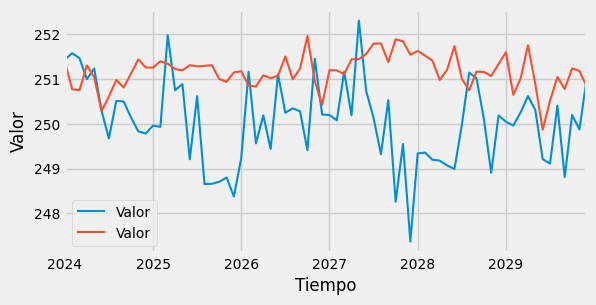

2.3817079087737536

In [ ]:
backtesting_rnn_2(df25,df25_train,df25_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1969 - val_loss: 0.1644
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1294 - val_loss: 0.1112
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0852 - val_loss: 0.0755
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - val_loss: 0.0546
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - val_loss: 0.0443
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0350 - val_loss: 0.0401
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - val_loss: 0.0388
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - val_loss: 0.0384
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0318 - val_loss: 0.0384
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - val_loss: 0.0384
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - val_loss: 0.0385
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - val_loss: 0.0385
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

  0%|          | 0/8 [00:00<?, ?it/s]

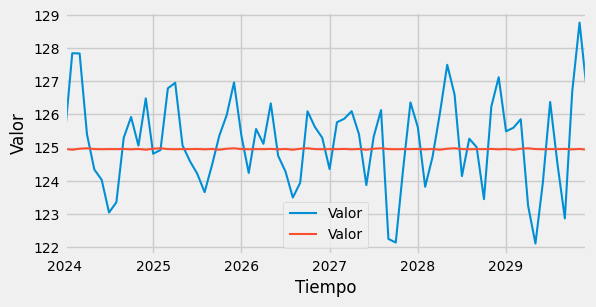

1.9150995560302744

In [ ]:
backtesting_rnn_2(df26,df26_train,df26_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.8583 - val_loss: 0.1115
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5158 - val_loss: 0.0751
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1516 - val_loss: 0.3578
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - val_loss: 0.1904
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.1769
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.2061
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.2040
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.7136e-04 - val_loss: 0.1939
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5804e-04 - val_loss: 0.1994
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4596e-04 - val_loss: 0.1996
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0185e-04 - val_loss: 0.1979
Epoch 5/8
9/9 ━━

  0%|          | 0/8 [00:00<?, ?it/s]

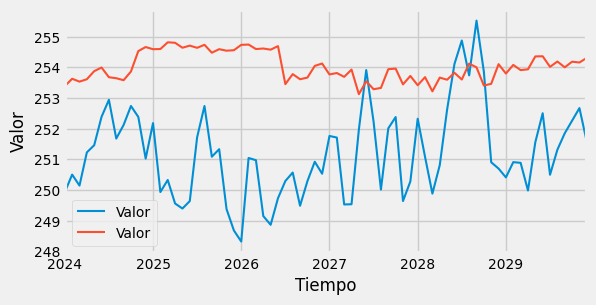

10.562762601692445

In [ ]:
backtesting_rnn_2(df27,df27_train,df27_test,[columna],10,20,8,30,144)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.6458 - val_loss: 0.1566
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2144 - val_loss: 0.0694
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - val_loss: 0.0932
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.0731
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - val_loss: 0.0863
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0772
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0776
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0013 - val_loss: 0.0773
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0757
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0770
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0767
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━

  0%|          | 0/8 [00:00<?, ?it/s]

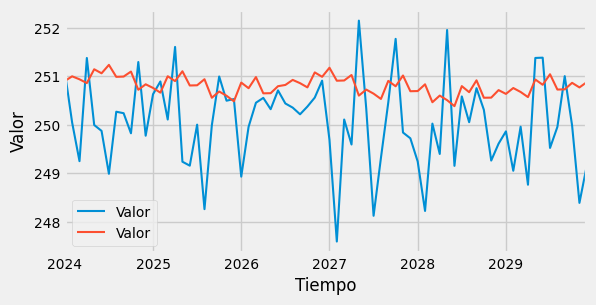

1.4694745737426034

In [ ]:
backtesting_rnn_2(df28,df28_train,df28_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2578 - val_loss: 0.1064
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0947 - val_loss: 0.0485
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - val_loss: 0.0390
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - val_loss: 0.0355
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - val_loss: 0.0330
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 - val_loss: 0.0326
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0366 - val_loss: 0.0328
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - val_loss: 0.0348
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0359 - val_loss: 0.0326
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - val_loss: 0.0324
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0366 - val_loss: 0.0333
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - val_loss: 0.0333
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 

  0%|          | 0/8 [00:00<?, ?it/s]

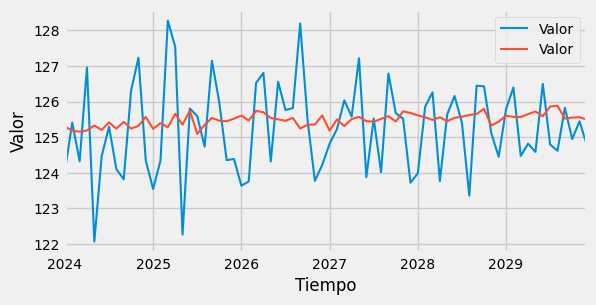

1.6592319489691953

In [ ]:
backtesting_rnn_2(df29,df29_train,df29_test,[columna],10,20,8,30,144)

keras version: 3.4.1
Using backend: tensorflow
tensorflow version: 2.17.0
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

/usr/local/lib/python3.10/dist-packages/skforecast/ForecasterRnn/ForecasterRnn.py:265: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.4411 - val_loss: 0.4336
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0929 - val_loss: 0.4838
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - val_loss: 0.3514
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.3296
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.3181
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.3123
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.3119
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.3055
Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0011 - val_loss: 0.2990
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 0.3029
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.2987
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1293e-04 - val_loss: 0.2984
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━

  0%|          | 0/8 [00:00<?, ?it/s]

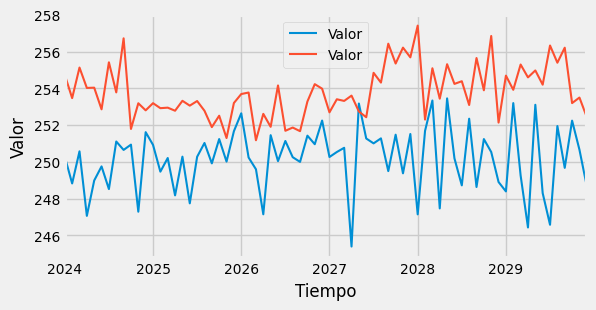

18.935271616212834

In [ ]:
backtesting_rnn_2(df30,df30_train,df30_test,[columna],10,20,8,30,144)